# Compile the main simulator code using cython 

In [100]:
!python ../setup.py build_ext --inplace

running build_ext
copying build/lib.macosx-10.9-x86_64-cpython-38/agent_timestep_plasticity.cpython-38-darwin.so -> 
running build_ext
copying build/lib.macosx-10.9-x86_64-cpython-38/agent_timestep_stop_signal.cpython-38-darwin.so -> 
/Users/cristina/Desktop/CBGTpy_sonoma/CBGTPy/notebooks/agent_timestep_stop_signal.cpython-38-darwin.so
/Users/cristina/Desktop/CBGTpy_sonoma/CBGTPy/notebooks/agent_timestep_plasticity.cpython-38-darwin.so


# Import all the relevant files 

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import pickle
import seaborn as sns
import pathos.multiprocessing
import gc

In [102]:
def saveresults_vars(variable, prefix):
    pickle.dump(variable, open(prefix, 'wb'))
    
def loadresults_vars(prefix):
    return pickle.load(open(prefix, "rb"))

data_dir = "../Results/Data_results/sims_test-cases_300/"
figure_dir = "../Results/Figures_results/sims_test-cases_300/"

# Import files 

In [103]:
datatables_go = loadresults_vars(data_dir+'datatables_total/datatables_total_go')
datatables_stn = loadresults_vars(data_dir+'datatables_total/datatables_total_STN-only')
datatables_stn_06 = loadresults_vars(data_dir+'datatables_total/datatables_total_STN_06')
datatables_stn_10 = loadresults_vars(data_dir+'datatables_total/datatables_total_STN_10')
datatables_gpea = loadresults_vars(data_dir+'datatables_total/datatables_total_GPeA-only')
datatables_ispn = loadresults_vars(data_dir+'datatables_total/datatables_total_iSPN-only')
datatables_stn_gpea = loadresults_vars(data_dir+'datatables_total/datatables_total_STN+GPeA')
datatables_ispn_gpea = loadresults_vars(data_dir+'datatables_total/datatables_total_iSPN+GPeA')
datatables_ispn_gpea_06 = loadresults_vars(data_dir+'datatables_total/datatables_total_iSPN+GPeA_06')
datatables_ispn_gpea_all06 = loadresults_vars(data_dir+'datatables_total/datatables_total_iSPN+GPeA_all06')
datatables_ispn_stn = loadresults_vars(data_dir+'datatables_total/datatables_total_STN+iSPN')
datatables_ispn_stn_gpea = loadresults_vars(data_dir+'datatables_total/datatables_total_iSPN+STN+GPeA')

In [5]:
p_stop_go = loadresults_vars(data_dir+'p_stop_average/p_stop_average_go')
p_stop_stn = loadresults_vars(data_dir+'p_stop_average/p_stop_average_STN-only')
p_stop_stn_06 = loadresults_vars(data_dir+'p_stop_average/p_stop_average_STN_06')
p_stop_stn_10 = loadresults_vars(data_dir+'p_stop_average/p_stop_average_STN_10onset')
p_stop_gpea = loadresults_vars(data_dir+'p_stop_average/p_stop_average_GPeA-only')
p_stop_ispn = loadresults_vars(data_dir+'p_stop_average/p_stop_average_iSPN-only')
p_stop_stn_gpea = loadresults_vars(data_dir+'p_stop_average/p_stop_average_STN+GPeA')
p_stop_ispn_gpea_02 = loadresults_vars(data_dir+'p_stop_average/p_stop_average_iSPN+GPeA_02')
p_stop_ispn_gpea = loadresults_vars(data_dir+'p_stop_average/p_stop_average_iSPN+GPeA')
p_stop_ispn_gpea_06 = loadresults_vars(data_dir+'p_stop_average/p_stop_average_iSPN+GPeA_06')
p_stop_ispn_gpea_08 = loadresults_vars(data_dir+'p_stop_average/p_stop_average_iSPN+GPeA_08')
p_stop_ispn_gpea_all06 = loadresults_vars(data_dir+'p_stop_average/p_stop_average_iSPN+GPeA_all06')
p_stop_ispn_stn = loadresults_vars(data_dir+'p_stop_average/p_stop_average_STN+iSPN')
p_stop_ispn_stn_gpea = loadresults_vars(data_dir+'p_stop_average/p_stop_average_iSPN+STN+GPeA')

In [6]:
p_stop_total = pd.DataFrame()
p_stop_go = p_stop_go.rename({'p_stop': 'Go'}, axis=1)
p_stop_stn = p_stop_stn.rename({'p_stop': 'STN-only'}, axis=1)
p_stop_stn_06 = p_stop_stn_06.rename({'p_stop': 'STN-only'}, axis=1)
p_stop_stn_10 = p_stop_stn_10.rename({'p_stop': 'STN-only-ons10'}, axis=1)
p_stop_gpea = p_stop_gpea.rename({'p_stop': 'GPeA-only'}, axis=1)
p_stop_ispn = p_stop_ispn.rename({'p_stop': 'iSPN-only'}, axis=1)
p_stop_stn_gpea = p_stop_stn_gpea.rename({'p_stop': 'STN+GPeA'}, axis=1)
p_stop_ispn_gpea = p_stop_ispn_gpea.rename({'p_stop': 'iSPN+GPeA'}, axis=1)
p_stop_ispn_gpea_06 = p_stop_ispn_gpea_06.rename({'p_stop': 'iSPN+GPeA-ampl06'}, axis=1)
p_stop_ispn_gpea_all06 = p_stop_ispn_gpea.rename({'p_stop': 'iSPN+GPeA-all06'}, axis=1)
p_stop_stn_ispn = p_stop_ispn_stn.rename({'p_stop': 'STN+iSPN'}, axis=1)
p_stop_ispn_stn_gpea = p_stop_ispn_stn_gpea.rename({'p_stop': 'iSPN+STN+GPeA'}, axis=1)
p_stop_total = pd.concat([p_stop_go['Go'], p_stop_stn_06['STN-only'], 
                          p_stop_gpea['GPeA-only'], p_stop_ispn['iSPN-only'], 
                          p_stop_ispn_gpea['iSPN+GPeA'], p_stop_stn_gpea['STN+GPeA'],
                          p_stop_stn_ispn['STN+iSPN'], p_stop_ispn_stn_gpea['iSPN+STN+GPeA']], 
                          axis=1 )

In [7]:
p_stop_total

,Go,STN-only,GPeA-only,iSPN-only,iSPN+GPeA,STN+GPeA,STN+iSPN,iSPN+STN+GPeA
0,0.033333,0.066667,0.466667,0.766667,0.600000,0.366667,0.600000,0.833333
1,0.066667,0.233333,0.466667,0.633333,0.600000,0.466667,0.700000,0.800000
2,0.000000,0.166667,0.500000,0.600000,0.533333,0.466667,0.833333,0.833333
3,0.066667,0.100000,0.300000,0.800000,0.633333,0.566667,0.666667,0.600000
4,0.033333,0.000000,0.333333,0.666667,0.633333,0.466667,0.533333,0.800000
5,0.033333,0.133333,0.466667,0.700000,0.700000,0.233333,0.633333,0.800000
6,0.033333,0.266667,0.466667,0.733333,0.666667,0.466667,0.766667,0.700000
7,0.033333,0.000000,0.300000,0.700000,0.666667,0.466667,0.633333,0.800000
8,0.066667,0.100000,0.366667,0.800000,0.766667,0.466667,0.900000,0.800000
9,0.000000,0.000000,0.466667,0.700000,0.600000,0.233333,0.600000,0.700000


In [8]:
#p_stop_test = pd.DataFrame()
#p_stop_ispn_gpea = p_stop_ispn_gpea.rename({'p_stop': 'iSPN+GPeA-control'}, axis=1)
#p_stop_ispn_gpea_02 = p_stop_ispn_gpea_02.rename({'p_stop': 'iSPN+GPeA-ispns02'}, axis=1)
#p_stop_ispn_gpea_06 = p_stop_ispn_gpea_06.rename({'p_stop': 'iSPN+GPeA-gpea06'}, axis=1)
#p_stop_ispn_gpea_08 = p_stop_ispn_gpea_08.rename({'p_stop': 'iSPN+GPeA-gpea08'}, axis=1)
#p_stop_ispn_gpea_all06 = p_stop_ispn_gpea_all06.rename({'p_stop': 'iSPN+GPeA-all06'}, axis=1)
#p_stop_test = pd.concat([p_stop_ispn_gpea_02['iSPN+GPeA-ispns02'], p_stop_ispn_gpea['iSPN+GPeA-control'], 
                         #p_stop_ispn_gpea_06['iSPN+GPeA-gpea06'],
                         #p_stop_ispn_gpea_08['iSPN+GPeA-gpea08'], p_stop_ispn_gpea_all06['iSPN+GPeA-all06']], 
                         #axis=1)

In [91]:
rt_total = pd.DataFrame()
#rt_go = p_stop_go.rename({'p_stop': 'Go'}, axis=1)
rt_go = datatables_go.rename({'decisionduration': 'Go'}, axis=1)
rt_stn = datatables_stn.rename({'decisionduration': 'STN-only'}, axis=1)
rt_gpea = datatables_gpea.rename({'decisionduration': 'GPeA-only'}, axis=1)
rt_ispn = datatables_ispn.rename({'decisionduration': 'iSPN-only'}, axis=1)
rt_stn_gpea = datatables_stn_gpea.rename({'decisionduration': 'STN+GPeA'}, axis=1)
rt_ispn_gpea = datatables_ispn_gpea.rename({'decisionduration': 'iSPN+GPeA'}, axis=1)
rt_stn_ispn = datatables_ispn_stn.rename({'decisionduration': 'STN+iSPN'}, axis=1)
rt_ispn_stn_gpea = datatables_ispn_stn_gpea.rename({'decisionduration': 'iSPN+STN+GPeA'}, axis=1)
rt_total = pd.concat([rt_go['Go'], rt_stn['STN-only'], rt_gpea['GPeA-only'], rt_ispn['iSPN-only'], 
                   rt_ispn_gpea['iSPN+GPeA'], rt_stn_gpea['STN+GPeA'],rt_stn_ispn['STN+iSPN'],
                   rt_ispn_stn_gpea['iSPN+STN+GPeA']], 
                   axis=1 )

In [92]:
rt_total

,Go,STN-only,GPeA-only,iSPN-only,iSPN+GPeA,STN+GPeA,STN+iSPN,iSPN+STN+GPeA
0,301,133,108,301,287,301,301,301
1,167,260,301,301,301,291,301,301
2,96,128,285,282,283,301,301,301
3,108,99,293,301,289,301,301,301
4,245,267,301,292,301,290,286,301
...,...,...,...,...,...,...,...,...
295,102,102,99,301,301,300,301,301
296,187,193,231,300,301,93,301,301
297,245,83,141,289,301,86,285,301
298,50,210,301,301,75,274,301,301


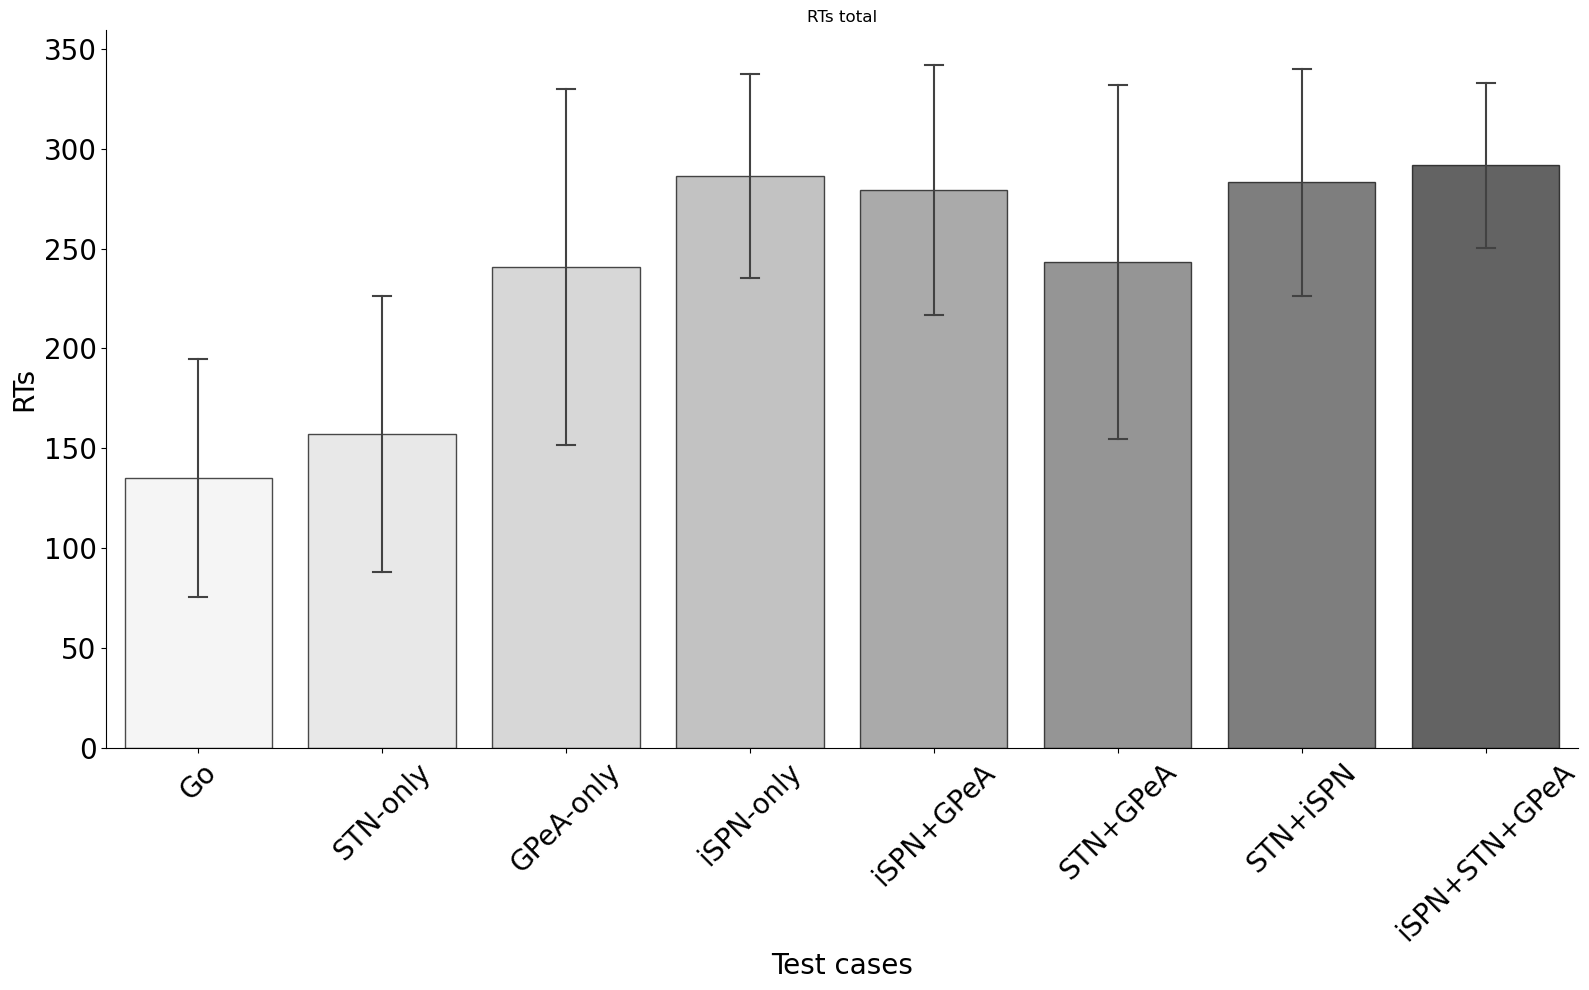

In [99]:
#RTs 

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(16,10), tight_layout=True)
sns.barplot(data=rt_total, errorbar="sd", alpha=.7, 
            capsize=.1, errwidth=1.5,  palette="Greys", edgecolor='k')

ax.spines[['right', 'top']].set_visible(False)
ax.set_ylabel('RTs', fontsize=20)
ax.set_xlabel('Test cases', fontsize=20)
plt.title('RTs total')

plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=45)

plt.savefig(figure_dir_new+'RTs_total.png', dpi=200)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

STN-only v.s. GPeA-only: t-test independent samples with Bonferroni correction, P_val=1.966e-06 stat=-7.838e+00
GPeA-only v.s. iSPN-only: t-test independent samples with Bonferroni correction, P_val=2.322e-07 stat=-9.078e+00
iSPN-only v.s. iSPN+GPeA: t-test independent samples with Bonferroni correction, P_val=1.693e-01 stat=2.386e+00
STN-only v.s. iSPN-only: t-test independent samples with Bonferroni correction, P_val=1.732e-11 stat=-1.639e+01
STN+GPeA v.s. iSPN+STN+GPeA: t-test independent samples with Bonferroni correction, P_val=9.168e-07 stat=-8.268e+00
iSPN-only v.s. iSPN+STN+GPeA: t-test independent samples with Bonferroni correction, P_val=5.519e-01 stat=-1.780e+00


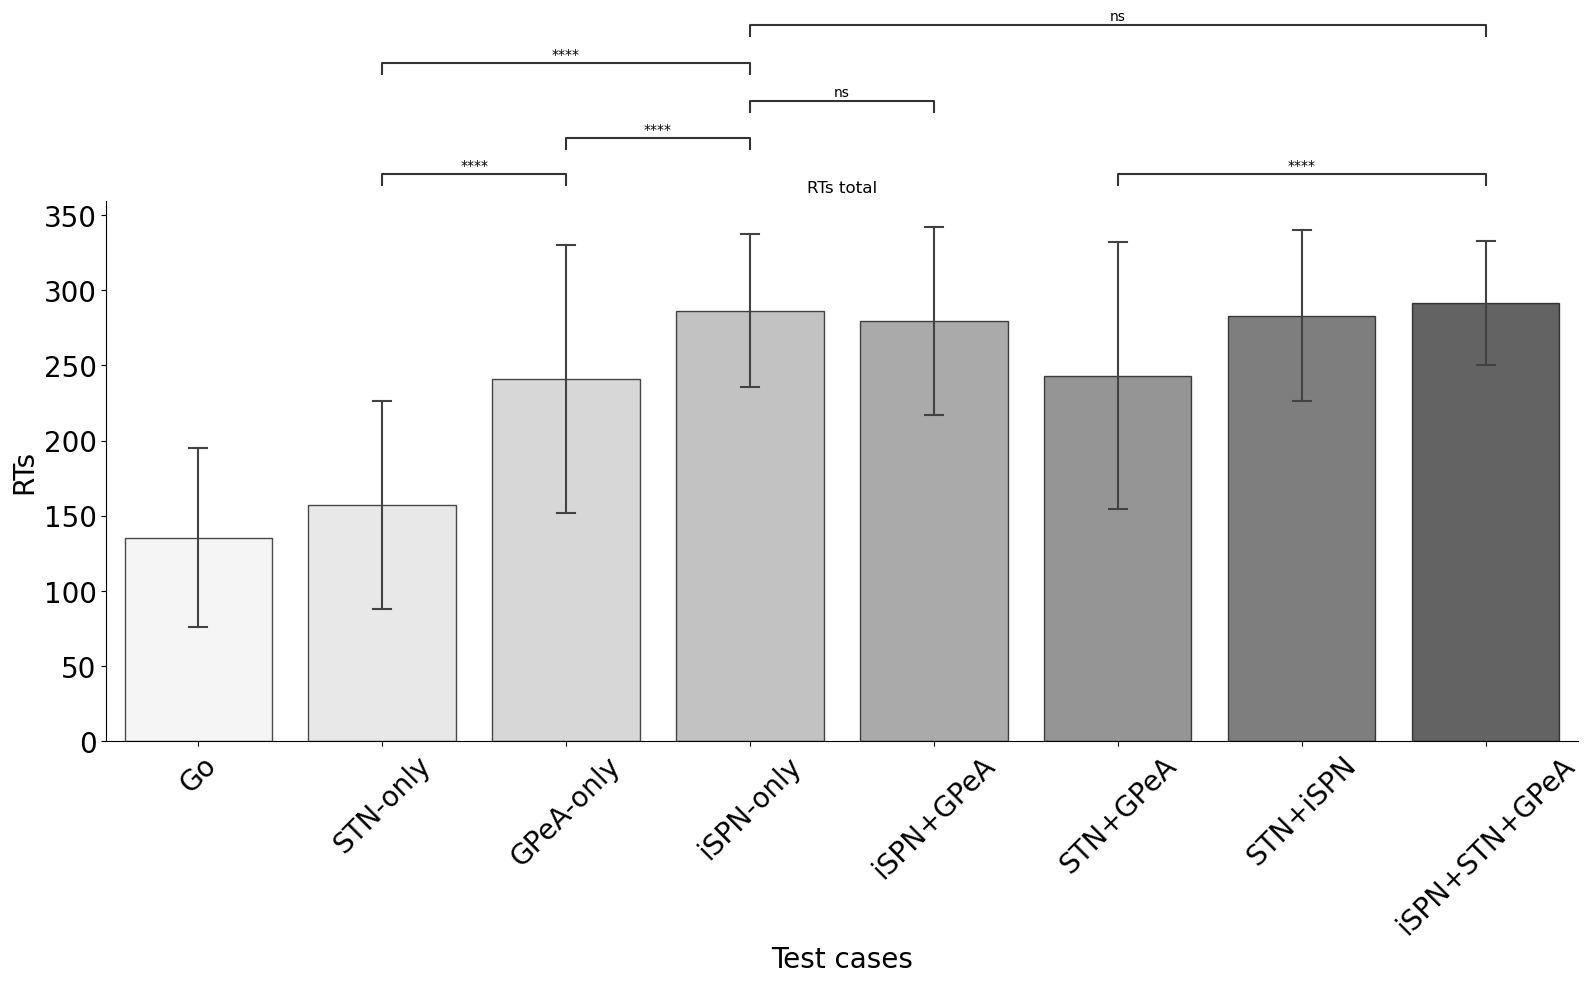

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

col_order = ['Go', 'STN-only', 'GPeA-only', 'iSPN-only', 
              'iSPN+GPeA', 'STN+GPeA', 'STN+iSPN', 'iSPN+STN+GPeA']
fig, ax = plt.subplots(1,1, figsize=(16,10), tight_layout=True)
sns.barplot(data=rt_total, errorbar="sd", alpha=.7, 
            capsize=.1, errwidth=1.5,  palette="Greys", edgecolor='k')

test_results = add_stat_annotation(ax, data=p_stop_total, order=col_order,
                                   box_pairs=[("STN-only", "GPeA-only"), 
                                              ("STN-only", "iSPN-only"),
                                              ("GPeA-only", "iSPN-only"), 
                                              ("iSPN-only", "iSPN+STN+GPeA"), 
                                              ("STN+GPeA", "iSPN+STN+GPeA"), 
                                              ("iSPN-only", "iSPN+GPeA")],
                                   test='t-test_ind', text_format='star',
                                   loc='outside', verbose=2)

ax.spines[['right', 'top']].set_visible(False)
ax.set_ylabel('RTs', fontsize=20)
ax.set_xlabel('Test cases', fontsize=20)
plt.title('RTs total')

plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=45)

plt.savefig(figure_dir_new+'RTs_total_ttest.png', dpi=200)

In [12]:
#RTs -- consider multiple plots option - sns docu

#import seaborn as sns
#import matplotlib.pyplot as plt

#fig, ax = plt.subplots(1,1, figsize=(8,6))
#sns.histplot(data=datatables_d2_gpea_2, x='decisionduration', kde=True, ax = ax, color='orange', alpha=0.3)

#ax.spines[['right', 'top']].set_visible(False)
#ax.set_ylabel('Count')
#plt.title('GPeA+D2-stim task')
#plt.xlim(0, 305)
#plt.savefig(figure_dir+'RTs_hist_GPeA+D2_2.png')

In [13]:
#RTs -- consider multiple plots option 

#import seaborn as sns
#import matplotlib.pyplot as plt

#fig, ax = plt.subplots(1,1, figsize=(16,8))
#a = sns.histplot(data=datatables_go, x='decisionduration', fill=True, ax = ax, color='green', alpha=0.3, label='Go')
#a1 = sns.histplot(data=datatables_stn_06, x='decisionduration', fill=True, ax = ax, color='red', alpha=0.3, label='STN-only')

#plt.legend(loc='upper left')
#ax.spines[['right', 'top']].set_visible(False)
#ax.set_ylabel('Count')
#ax.set_ylabel('Count')
#plt.title('STN-stim task')
#plt.xlim(0, 300)
#plt.savefig(figure_dir+'RTs_hist_comp_06.png')

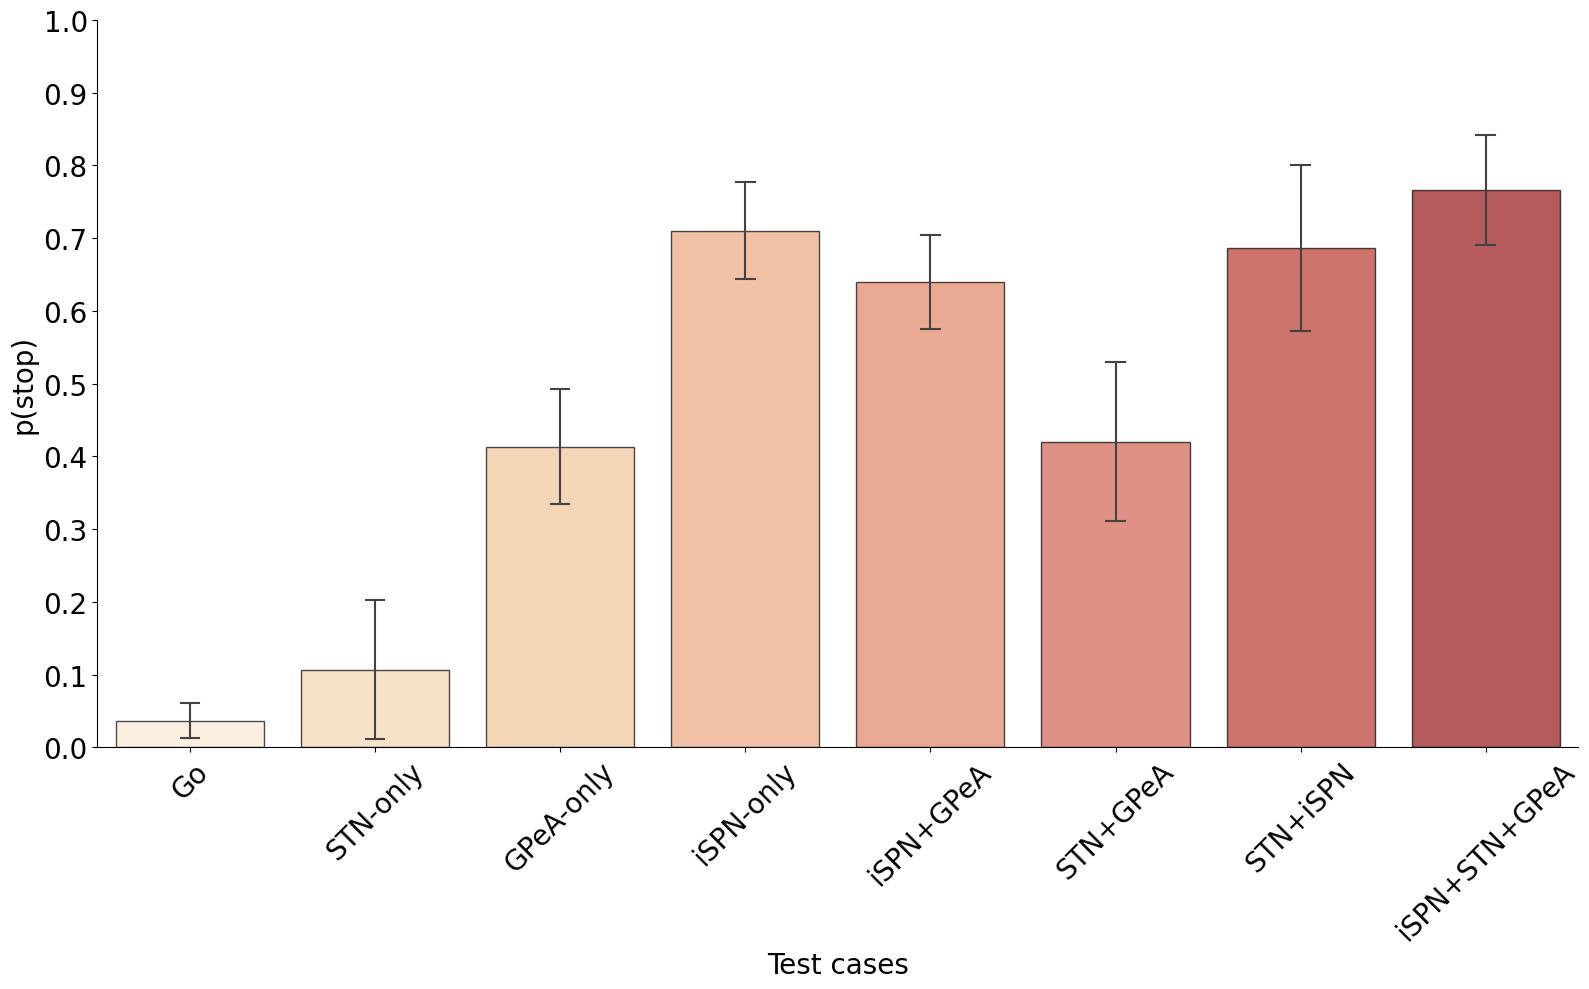

In [14]:
import seaborn as sns
figure_dir_new='../Results/Experimental_results/'
fig, ax = plt.subplots(1,1, figsize=(16,10), tight_layout=True)

#sns.set("paper", font_scale=1.)
#plt.bar(0.5, true, color='thistle', align='center')
sns.barplot(data=p_stop_total, errorbar="sd", alpha=.7, 
            capsize=.1, errwidth=1.5,  palette="OrRd", edgecolor='k')
#sns.barplot(data=p_stop_total, errorbar="sd",
            #capsize=.1, errwidth=2, errcolor=".5", edgecolor=".5", 
            #facecolor=(0, 0, 0, 0), linewidth=2, gist_rainbow)
#palette="OrRd",
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylabel('p(stop)', fontsize=20.)
ax.set_xlabel('Test cases', fontsize=20.)
ax.set_ylim(0,1)
ax.spines[['right', 'top']].set_visible(False)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=45)
#ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')

plt.savefig(figure_dir_new+'p_stop_total', dpi=300)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

STN-only v.s. GPeA-only: t-test independent samples with Bonferroni correction, P_val=1.966e-06 stat=-7.838e+00
GPeA-only v.s. iSPN-only: t-test independent samples with Bonferroni correction, P_val=2.322e-07 stat=-9.078e+00
iSPN-only v.s. iSPN+GPeA: t-test independent samples with Bonferroni correction, P_val=1.693e-01 stat=2.386e+00
STN-only v.s. iSPN-only: t-test independent samples with Bonferroni correction, P_val=1.732e-11 stat=-1.639e+01
STN+GPeA v.s. iSPN+STN+GPeA: t-test independent samples with Bonferroni correction, P_val=9.168e-07 stat=-8.268e+00
iSPN-only v.s. iSPN+STN+GPeA: t-test independent samples with Bonferroni correction, P_val=5.519e-01 stat=-1.780e+00


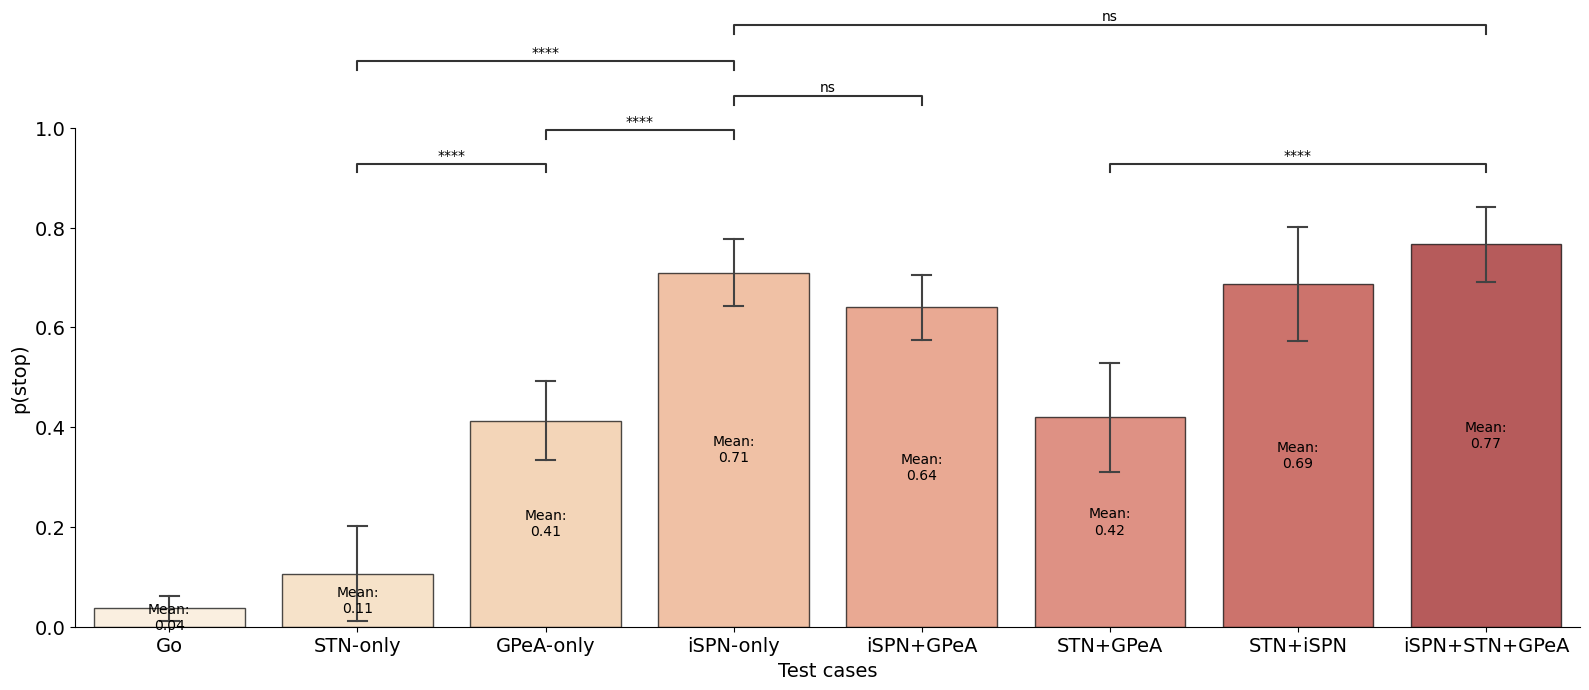

In [84]:
import seaborn as sns
import statannot
from statannot import add_stat_annotation

fig, ax = plt.subplots(1,1, figsize=(16,7), tight_layout=True)


col_order = ['Go', 'STN-only', 'GPeA-only', 'iSPN-only', 
              'iSPN+GPeA', 'STN+GPeA', 'STN+iSPN', 'iSPN+STN+GPeA']
ax = sns.barplot(data=p_stop_total, errorbar="sd", alpha=.7, 
            capsize=.1, errwidth=1.5,  palette="OrRd", edgecolor='k', order=col_order)

test_results = add_stat_annotation(ax, data=p_stop_total, order=col_order,
                                   box_pairs=[("STN-only", "GPeA-only"), 
                                              ("STN-only", "iSPN-only"),
                                              ("GPeA-only", "iSPN-only"), 
                                              ("iSPN-only", "iSPN+STN+GPeA"), 
                                              ("STN+GPeA", "iSPN+STN+GPeA"), 
                                              ("iSPN-only", "iSPN+GPeA")],
                                   test='t-test_ind', text_format='star',
                                   loc='outside', verbose=2)
test_results


#ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylabel('p(stop)', fontsize=14.)
ax.set_xlabel('Test cases', fontsize=14.)
ax.set_ylim(0,1)
ax.spines[['right', 'top']].set_visible(False)

ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')

plt.savefig(figure_dir_new+'p_stop_total_new-stn_statannot_ttest', dpi=300)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

STN-only v.s. GPeA-only: t-test independent samples with Bonferroni correction, P_val=1.966e-06 stat=-7.838e+00
GPeA-only v.s. iSPN-only: t-test independent samples with Bonferroni correction, P_val=2.322e-07 stat=-9.078e+00
iSPN-only v.s. iSPN+GPeA: t-test independent samples with Bonferroni correction, P_val=1.693e-01 stat=2.386e+00
STN-only v.s. iSPN-only: t-test independent samples with Bonferroni correction, P_val=1.732e-11 stat=-1.639e+01
STN+GPeA v.s. iSPN+STN+GPeA: t-test independent samples with Bonferroni correction, P_val=9.168e-07 stat=-8.268e+00
iSPN-only v.s. iSPN+STN+GPeA: t-test independent samples with Bonferroni correction, P_val=5.519e-01 stat=-1.780e+00


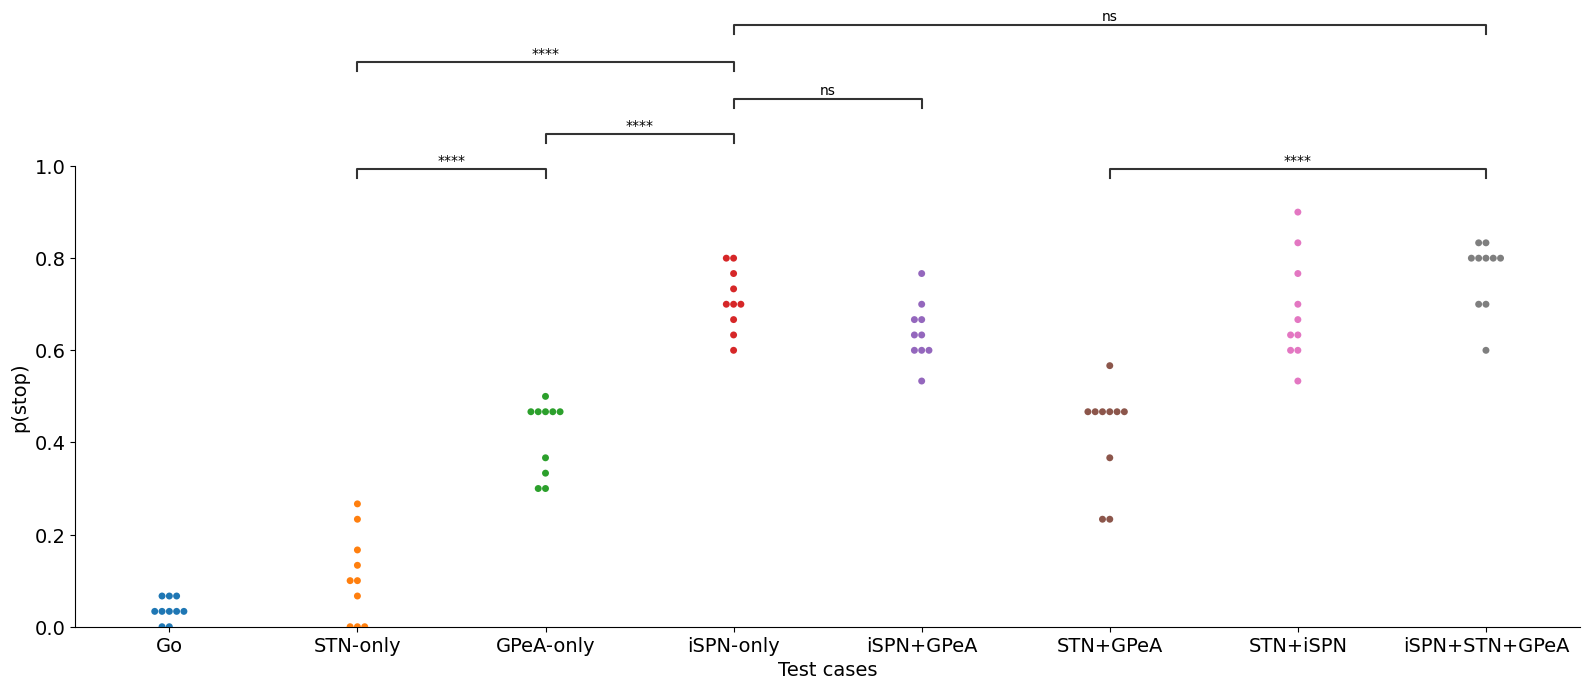

In [83]:
import seaborn as sns
import statannot
from statannot import add_stat_annotation

fig, ax = plt.subplots(1,1, figsize=(16,7), tight_layout=True)


col_order = ['Go', 'STN-only', 'GPeA-only', 'iSPN-only', 
              'iSPN+GPeA', 'STN+GPeA', 'STN+iSPN', 'iSPN+STN+GPeA']
ax = sns.swarmplot(data=p_stop_total, order=col_order)

test_results = add_stat_annotation(ax, data=p_stop_total, order=col_order,
                                   box_pairs=[("STN-only", "GPeA-only"), 
                                              ("STN-only", "iSPN-only"),
                                              ("GPeA-only", "iSPN-only"), 
                                              ("iSPN-only", "iSPN+STN+GPeA"), 
                                              ("STN+GPeA", "iSPN+STN+GPeA"), 
                                              ("iSPN-only", "iSPN+GPeA")],
                                   test='t-test_ind', text_format='star',
                                   loc='outside', verbose=2)
test_results


#ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylabel('p(stop)', fontsize=14.)
ax.set_xlabel('Test cases', fontsize=14.)
ax.set_ylim(0,1)
ax.spines[['right', 'top']].set_visible(False)

#ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')

plt.savefig(figure_dir_new+'p_stop_total_new-stn_statannot_swarm_ttest', dpi=300)

In [82]:
#ANOVA
from scipy.stats import f_oneway
f_oneway(p_stop_total['Go'],p_stop_total['STN-only'], p_stop_total['GPeA-only'], p_stop_total['iSPN-only'], 
         p_stop_total['iSPN+GPeA'], p_stop_total['STN+GPeA'], p_stop_total['STN+iSPN'], p_stop_total['iSPN+STN+GPeA'])

F_onewayResult(statistic=113.16009962321993, pvalue=2.992620780380894e-36)

In [72]:
p_stop_total.mean()

Go               0.036667
STN-only         0.106667
GPeA-only        0.413333
iSPN-only        0.710000
iSPN+GPeA        0.640000
STN+GPeA         0.420000
STN+iSPN         0.686667
iSPN+STN+GPeA    0.766667
dtype: float64

In [73]:
p_stop_total.std()

Go               0.024595
STN-only         0.095323
GPeA-only        0.078881
iSPN-only        0.066759
iSPN+GPeA        0.064406
STN+GPeA         0.109093
STN+iSPN         0.114612
iSPN+STN+GPeA    0.075359
dtype: float64

In [76]:
data_stats = p_stop_total.agg(['mean', 'std'])
#data_test = data_test.transpose()
#data_test.columns = ['test_cases', 'mean', 'std'] #rename the columns
#data_test.index.name = 'test_case'
#data_test.columns.name = 'data'
data_stats = data_stats.transpose()
data_stats

,mean,std
Go,0.036667,0.024595
STN-only,0.106667,0.095323
GPeA-only,0.413333,0.078881
iSPN-only,0.710000,0.066759
iSPN+GPeA,0.640000,0.064406
STN+GPeA,0.420000,0.109093
STN+iSPN,0.686667,0.114612
iSPN+STN+GPeA,0.766667,0.075359


In [61]:
p_stop_perc_mean = pd.DataFrame()
p_stop_perc_mean = p_stop_total.div(np.mean(p_stop_total['iSPN+STN+GPeA']))
p_stop_perc_mean

,Go,STN-only,GPeA-only,iSPN-only,iSPN+GPeA,STN+GPeA,STN+iSPN,iSPN+STN+GPeA
0,0.043478,0.086957,0.608696,1.000000,0.782609,0.478261,0.782609,1.086957
1,0.086957,0.304348,0.608696,0.826087,0.782609,0.608696,0.913043,1.043478
2,0.000000,0.217391,0.652174,0.782609,0.695652,0.608696,1.086957,1.086957
3,0.086957,0.130435,0.391304,1.043478,0.826087,0.739130,0.869565,0.782609
4,0.043478,0.000000,0.434783,0.869565,0.826087,0.608696,0.695652,1.043478
5,0.043478,0.173913,0.608696,0.913043,0.913043,0.304348,0.826087,1.043478
6,0.043478,0.347826,0.608696,0.956522,0.869565,0.608696,1.000000,0.913043
7,0.043478,0.000000,0.391304,0.913043,0.869565,0.608696,0.826087,1.043478
8,0.086957,0.130435,0.478261,1.043478,1.000000,0.608696,1.173913,1.043478
9,0.000000,0.000000,0.608696,0.913043,0.782609,0.304348,0.782609,0.913043


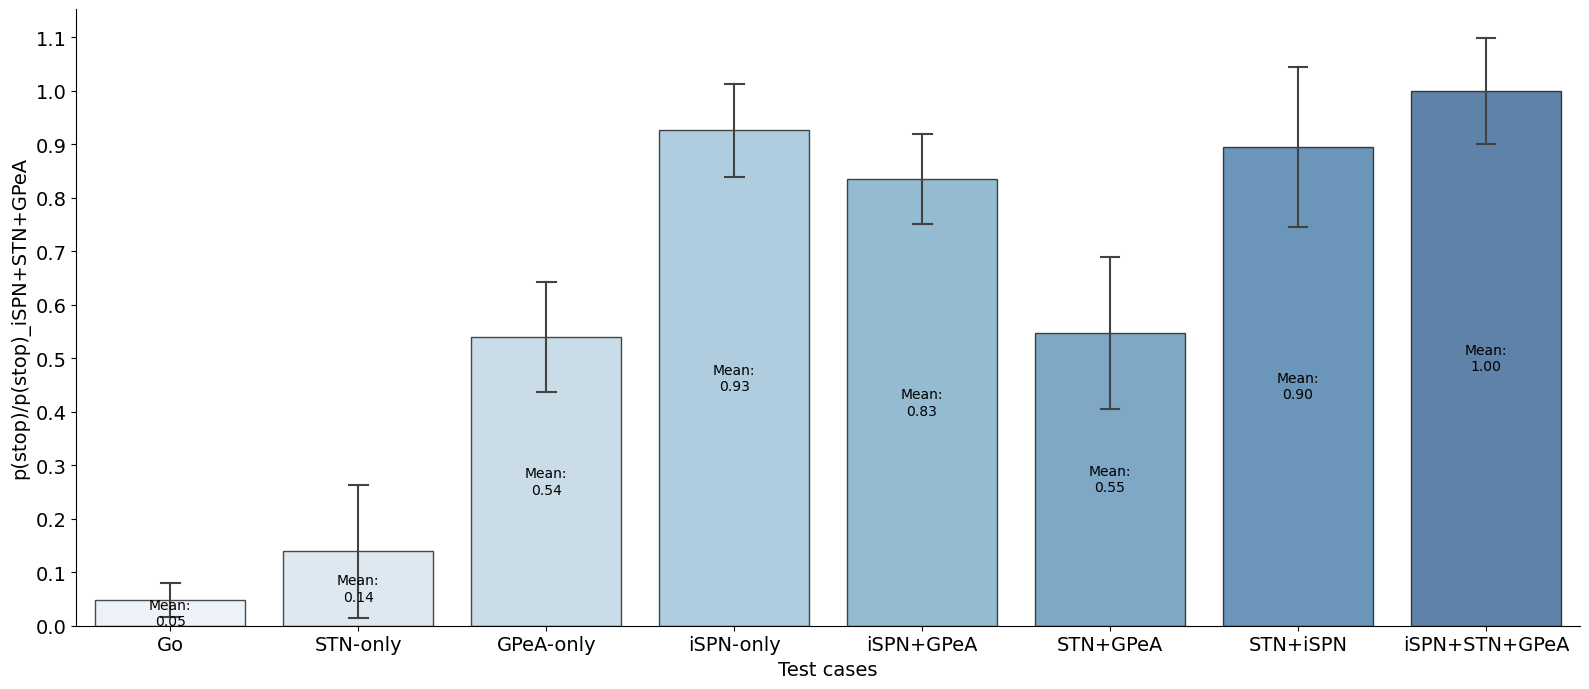

In [62]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(16,7), tight_layout=True)

#sns.set("paper", font_scale=1.)
#plt.bar(0.5, true, color='thistle', align='center')
sns.barplot(data=p_stop_perc_mean, errorbar="sd", alpha=.7, 
            capsize=.1, errwidth=1.5,  palette="Blues", edgecolor='k')
#sns.barplot(data=p_stop_total, errorbar="sd",
            #capsize=.1, errwidth=2, errcolor=".5", edgecolor=".5", 
            #facecolor=(0, 0, 0, 0), linewidth=2, gist_rainbow)
#palette="OrRd",
ax.set_yticks(np.arange(0, 1.2, 0.1))
ax.set_ylabel('p(stop)/p(stop)_iSPN+STN+GPeA', fontsize=14.)
ax.set_xlabel('Test cases', fontsize=14.)
#ax.set_ylim(0,1)
ax.spines[['right', 'top']].set_visible(False)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')

plt.savefig(figure_dir+'p_stop_total_fraction', dpi=300)

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(10,5), tight_layout=True)

#plt.bar(0.5, true, color='thistle', align='center')
sns.barplot(data=p_stop_test, errorbar="sd", alpha=0.6, 
            capsize=.1, errwidth=1.5, palette="rocket_r")

ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')

#sns.barplot(data=decision_average, x='left', y='p_decision', errorbar="sd")
ax.set_yticks(np.arange(0, 1.1, 0.1), fontsize=14.)
ax.set_ylabel('p(stop)', fontsize=14.)
ax.set_ylim(0,1)
ax.spines[['right', 'top']].set_visible(False)
   
#ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='edge')

plt.savefig(figure_dir+'p_stop_TEST')

In [ ]:
# Comparison all trials 

import seaborn as sns
import matplotlib.pyplot as plt

repo_go = pd.DataFrame()
for i in datatables_go.index: 
    if datatables_go.decision.iloc[i] != 'none':
        temp = datatables_go.iloc[i]
        repo_go = repo_go.append(temp, ignore_index=True)
        
repo_d2 = pd.DataFrame()
for i in datatables_d2.index: 
    if datatables_d2.decision.iloc[i] != 'stop':
        temp = datatables_d2.iloc[i]
        repo_d2 = repo_d2.append(temp, ignore_index=True)
        
repo_d2_stn = pd.DataFrame()
for i in datatables_stn_d2.index: 
    if datatables_stn_d2.decision.iloc[i] != 'stop':
        temp = datatables_stn_d2.iloc[i]
        repo_d2_stn = repo_d2_stn.append(temp, ignore_index=True)

repo_stn = pd.DataFrame()
for i in datatables_stn.index: 
    if datatables_stn.decision.iloc[i] != 'stop':
        temp = datatables_stn.iloc[i]
        repo_stn = repo_stn.append(temp, ignore_index=True)
        
repo_gpea = pd.DataFrame()
for i in datatables_gpea.index: 
    if datatables_gpea.decision.iloc[i] != 'stop':
        temp = datatables_gpea.iloc[i]
        repo_gpea = repo_gpea.append(temp, ignore_index=True)

repo_stn_gpea = pd.DataFrame()
for i in datatables_stn_gpea.index: 
    if datatables_stn_gpea.decision.iloc[i] != 'stop':
        temp = datatables_stn_gpea.iloc[i]
        repo_stn_gpea = repo_stn_gpea.append(temp, ignore_index=True)

repo_d2_gpea = pd.DataFrame()
for i in datatables_d2_gpea.index: 
    if datatables_d2_gpea.decision.iloc[i] != 'stop':
        temp = datatables_d2_gpea.iloc[i]
        repo_d2_gpea = repo_d2_gpea.append(temp, ignore_index=True)

repo_d2_gpea_2 = pd.DataFrame()
for i in datatables_d2_gpea_2.index: 
    if datatables_d2_gpea_2.decision.iloc[i] != 'stop':
        temp = datatables_d2_gpea_2.iloc[i]
        repo_d2_gpea_2 = repo_d2_gpea_2.append(temp, ignore_index=True)

        
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10), tight_layout=True)
sns.histplot(data=repo_go, x="decisionduration", color='green', kde=True, alpha=0.3, ax=ax1)
sns.histplot(data=repo_stn, x="decisionduration", color='red', kde=True, alpha=0.3, ax=ax1)
#sns.histplot(data=repo_d2, x="decisionduration", color='dodgerblue', kde=True, alpha=0.7, ax=ax1)
sns.histplot(data=repo_gpea, x="decisionduration", color='darkcyan', kde=True, alpha=0.3, ax=ax1)
sns.histplot(data=repo_stn_gpea, x="decisionduration", color='purple', kde=True, alpha=0.4, ax=ax1)
sns.histplot(data=repo_d2_stn, x="decisionduration", color='deeppink', kde=True, alpha=0.7, ax=ax1)
sns.histplot(data=repo_d2_gpea, x="decisionduration", color='orange', kde=True, alpha=0.7, ax=ax1)

ax1.legend(title='Test cases', labels=['Go', 'STN-only','GPeA-only', 'STN+GPeA', 'STN+D2', 'D2+GPeA'], loc='upper left')
ax1.set_title('RTs distributions - Failed stops', fontsize=14.)
ax1.set_xlabel('Decision duration (ms)')
ax1.set_xlim(0, 300)

#colors = ['limegreen','red','dodgerblue','darcyan','purple', 'deeppink', 'orange']
#custom_palette = sns.set_palette(sns.color_palette(palette))
#plt.bar(['Go', 'STN-only', 'D2-only', 'D2+STN', 'GPeA-only', 'GPeP-only'],table['p(stop)'],  alpha=0.4)
splot = sns.barplot(table, x='test_case', y='p(stop)', palette='rocket', ax = ax2, alpha=0.75)


for g in splot.patches:
    splot.annotate(format(g.get_height(), '.2f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
ax2.set(ylim=(0,1.))
ax2.set_title('p(stop) across test cases', fontsize=14.)
ax2.set_xlabel('Test cases')
ax2.set_ylabel('p(stop)')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

#plt.savefig(figure_dir+'kde_RTs_dist_comparison_all.png')
plt.savefig(figure_dir+'RT+p-stop.png')

In [ ]:
#Comparison - kde
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(8,6))
sns.kdeplot(data=datatables_stn, x="decisionduration", color='red', fill=True, alpha=0.3, ax=ax)
sns.kdeplot(data=datatables_go, x="decisionduration", color='green', fill=True, alpha=0.2, ax=ax)

plt.legend(title='Test cases', labels=['STN-only', 'Go'])
plt.title('RTs - Comparison STN stim trials')

plt.savefig(figure_dir+'kde_RTs_comparison_.png')

## Importing popfreqs and datatables for average FRs analysis

In [ ]:
results = loadresults_vars(data_dir+'results_')

In [ ]:
plt_help.rename_columns(results[0])
popfreqs = results[0]['popfreqs']
popfreqs
datatables = loadresults_vars(data_dir+'datatables_total_')
datatables = datatables.set_index(np.arange(0, 300))
datatables

## Average dynamics

### Distinction between Correct and Failed stop trials

In [ ]:
# CORRECT STOP trials - DATATABLES + FRs
rows_list = []

ratedf = popfreqs
ratedf_cs = pd.DataFrame()
for row in datatables.index:
    if datatables.decision[row] == 'stop': 
        dict_aux = {}
        dict_aux.update(datatables.iloc[row]) 
        rows_list.append(dict_aux)
        #print(datatables[0].iloc[row]['stimulusstarttime'])
        #print(ratedf[datatables[0].iloc[row]['stimulusstarttime']:datatables[0].iloc[row]['rewardtime']+601])
        ratedf_cs = ratedf_cs.append(ratedf[datatables.iloc[row]['stimulusstarttime']:datatables.iloc[row]['rewardtime']+601])
correct_stop = pd.DataFrame(rows_list) 
print('Correct stops:', len(correct_stop))
print(len(ratedf_cs))
#ratedf_cs

In [ ]:
import statistics

ratedf = popfreqs
keysInicials=[]
keysFinals=[]

#find the inicial key of each trial
for j in datatables.stimulusstarttime:
    i=0
    noTrobat=0
    while noTrobat==0 and i<len(ratedf['Time (ms)']):
        if ratedf['Time (ms)'][i]<j:
            i=i+1
        else: 
            noTrobat=1 
    keysInicials.append(i)

keysInicials_correctstop = []
keysInicials_failedstop = []

for z in datatables.index: #correctstop
    if datatables.decision[z] == 'stop':
        keysInicials_correctstop.append(datatables.stimulusstarttime[z])

for z in datatables.index: #failed stop
    if datatables.decision[z] != 'stop' and datatables.decisionduration[z]>55.:
        keysInicials_failedstop.append(datatables.stimulusstarttime[z])


#print('Inicials', keysInicials)
#print('Inicials Correct Stop', keysInicials_correctstop)
#print('Inicials Failed Stop', keysInicials_failedstop)

#find the final key of each trial

for j in datatables.rewardtime+601:
    i=0
    noTrobat=0
    while noTrobat==0 and i<len(ratedf['Time (ms)']):
        if ratedf['Time (ms)'][i]<j:
            i=i+1
        else: 
            noTrobat=1    
    keysFinals.append(i-1)  
    
keysFinals_correctstop = []
keysFinals_failedstop = []

for z in datatables.index: #correctstop
    if datatables.decision[z] == 'stop':
        keysFinals_correctstop.append(datatables.rewardtime[z]+601)
    
for z in datatables.index: #failed stop
    if datatables.decision[z] != 'stop'and datatables.decisionduration[z]>55.:
        keysFinals_failedstop.append(datatables.rewardtime[z]+601)

#print('Finals', keysFinals)
#print('Finals Correct Stop', keysFinals_correctstop)
#print('Finals Failed Stop', keysFinals_failedstop)

#find the length of the largest trial - Correct stop, always = 601
dif=[]
for i in range(0,len(keysInicials)):
    dif.append(keysFinals[i]-keysInicials[i])
L=max(dif)

print(L)
#print(keysInicials_correctstop)
#print(keysInicials_failedstop)

#find the length of the largest trial - Failed stop
#dif = []
#for i in range(0,len(keysInicials_failedstop)):
    #dif.append(keysFinals_failedstop[i]-keysInicials_failedstop[i])
      
#L_failed = max(dif)
#print(L_failed)

In [ ]:
print('Correct stops:', len(keysFinals_correctstop))
print('Failed stops:', len(keysFinals_failedstop))

### Correct stop trials

In [ ]:
#become all datatables of the same length

#CORRECT STOP
#plt_func.rename_columns(ratedf_cs)
Mean_newDic={}
Std_newDic={}

for BGregion in ratedf_cs:
    S=[]
    for i in range(0,len(keysInicials_correctstop)):
        region_i=ratedf[keysInicials_correctstop[i]:keysFinals_correctstop[i]+2].to_dict()
        region_i=list(region_i[BGregion].values())
        #print(region_i)
        li=len(region_i)
        #print(li)
        j=1
        while j<=L-li:
            region_i=region_i + [-1]
            j=j+1
        S.append(region_i)
    mean_t=[]
    std_t=[]
    for i in range(0,L):
        new_list=[]
        for ll in S:
            if ll[i]!= -1:
                new_list.append(ll[i])
        mean_t.append(statistics.mean(new_list)) #sum(new_list)/len(new_list))
        std_t.append(statistics.stdev(new_list))
    
    Mean_newDic[BGregion]=mean_t
    Std_newDic[BGregion]=std_t
    
print(len(Mean_newDic['GPi_right']))
#print(new_list)

In [ ]:
#CORRECT STOP trials - MEAN FRs plots

f, (ax1, ax2, ax3) = plt.subplots(3, 4, figsize=(16,10), sharex=True)

i=0
tmean=[]
while i<len(Mean_newDic['Cx_right']):
    tmean.append(len(Mean_newDic['Cx_right'])-i)
    i=i+1
tmean.sort()
#print(tmean)


#ax1[0].vlines(600,0, 50, color='silver', linewidth = .5)
#for k in np.arange(0, 300):
    #ax1[0].vlines(k, 0 , 50, color='mistyrose', alpha=0.01)
#for k in np.arange(300, 600):
    #ax1[0].vlines(k, 0, 50, color='whitesmoke', alpha=0.01)

for i in range(0,len(correct_stop)):
    ax1[0].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['Cx_right'])+120, color='silver', linewidth = .5)
ax1[0].plot(tmean,Mean_newDic['Cx_left'], label='Cx-left', color='darkorange')
ax1[0].fill_between(tmean,np.subtract(Mean_newDic['Cx_left'],Std_newDic['Cx_left']),np.add(Mean_newDic['Cx_left'],Std_newDic['Cx_left']), color='darkorange', alpha=.1)
ax1[0].plot(tmean,Mean_newDic['Cx_right'], label='Cx-right', color='steelblue')
ax1[0].fill_between(tmean,np.subtract(Mean_newDic['Cx_right'],Std_newDic['Cx_right']),np.add(Mean_newDic['Cx_right'],Std_newDic['Cx_right']),color='steelblue', alpha=.1)
ax1[0].legend()
ax1[0].set_title('Cx', weight='bold', fontsize=16)
ax1[0].set_ylim(0, 120)

for i in range(0,len(correct_stop)):
    ax1[1].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['CxI_common'])+120, color='silver', linewidth = 0.5)
ax1[1].plot(tmean,Mean_newDic['CxI_common'], color='green')
ax1[1].fill_between(tmean,np.subtract(Mean_newDic['CxI_common'],Std_newDic['CxI_common']),np.add(Mean_newDic['CxI_common'],Std_newDic['CxI_common']),color='green', alpha=.1)
#ax1[1].legend(['CxI'])
ax1[1].set_title('CxI', weight='bold', fontsize=16)
ax1[1].set_ylim(0, 120)

for i in range(0,len(correct_stop)):
    ax1[2].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['FSI_common'])+120, color='silver', linewidth = 0.5)
ax1[2].plot(tmean,Mean_newDic['FSI_common'], color='green')
ax1[2].fill_between(tmean,np.subtract(Mean_newDic['FSI_common'],Std_newDic['FSI_common']),np.add(Mean_newDic['FSI_common'],Std_newDic['FSI_common']), color='green', alpha=.1)
ax1[2].set_title('FSI', weight='bold', fontsize=16)
#ax1[1].legend(['FSI'])
ax1[2].set_ylim(0, 120)

for i in range(0,len(correct_stop)):
    ax2[0].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['GPeP_right'])+120, color='silver', linewidth = 0.5)
ax2[0].plot(tmean, Mean_newDic['GPeP_left'], label='GPeP-left', color='darkorange')
ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),np.add(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']), color='darkorange', alpha=.1)
ax2[0].plot(tmean, Mean_newDic['GPeP_right'], label='GPeP-right', color='steelblue')
ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_right'],Std_newDic['GPeP_right']),np.add(Mean_newDic['GPeP_right'],Std_newDic['GPeP_right']), color='steelblue', alpha=.1)
ax2[0].legend()
ax2[0].set_title('GPeP', weight='bold', fontsize=16)
ax2[0].set_ylim(0, 120)

for i in range(0,len(correct_stop)):
    ax2[1].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['GPeA_right'])+120, color='silver', linewidth = 0.5)
ax2[1].plot(tmean,Mean_newDic['GPeA_left'], label='GPeA-left', color='darkorange')
ax2[1].fill_between(tmean,np.subtract(Mean_newDic['GPeA_left'],Std_newDic['GPeA_left']),np.add(Mean_newDic['GPeA_left'],Std_newDic['GPeA_left']),color='darkorange', alpha=.1)
ax2[1].plot(tmean,Mean_newDic['GPeA_right'],label='GPeA-right', color='steelblue')
ax2[1].fill_between(tmean,np.subtract(Mean_newDic['GPeA_right'],Std_newDic['GPeA_right']),np.add(Mean_newDic['GPeA_right'],Std_newDic['GPeA_right']), color='steelblue', alpha=.1)
ax2[1].legend()
ax2[1].set_title('GPeA', weight='bold', fontsize=16)
ax2[1].set_ylim(0, 120)
#if results[0]['opt_signal_present'] == True: 
    #ax2[1].hlines(80, results[0]['opt_signal_onset'], results[0]['opt_signal_duration'], colors='darkcyan', linewidth = 4)


for i in range(0,len(correct_stop)):
    ax2[2].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['D2STR_right'])+120, color='silver', linewidth = 0.5)
ax2[2].plot(tmean,Mean_newDic['D2STR_left'], label='iSPN-left', color='darkorange')
ax2[2].fill_between(tmean,np.subtract(Mean_newDic['D2STR_left'],Std_newDic['D2STR_left']),np.add(Mean_newDic['D2STR_left'],Std_newDic['D2STR_left']),color='darkorange', alpha=.1)
ax2[2].plot(tmean,Mean_newDic['D2STR_right'],label='iSPN-right', color='steelblue')
ax2[2].fill_between(tmean,np.subtract(Mean_newDic['D2STR_right'],Std_newDic['D2STR_right']),np.add(Mean_newDic['D2STR_right'],Std_newDic['D2STR_right']),color='steelblue',alpha=.1)
ax2[2].legend()
ax2[2].set_title('iSPN', weight='bold', fontsize=16)
#if results[0]['stop_signal_present_2'] == True: 
#ax2[2].hlines(80, 55, 55+150, colors='yellowgreen', linewidth = 4)
ax2[2].set_ylim(0, 120)

for i in range(0,len(correct_stop)):
    ax2[3].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['D1STR_right'])+120, color='silver', linewidth = 0.5)
ax2[3].plot(tmean, Mean_newDic['D1STR_left'],label='dSPN-left', color='darkorange')
ax2[3].fill_between(tmean,np.subtract(Mean_newDic['D1STR_left'],Std_newDic['D1STR_left']),np.add(Mean_newDic['D1STR_left'],Std_newDic['D1STR_left']),color='darkorange',alpha=.1)
ax2[3].plot(tmean,Mean_newDic['D1STR_right'], label='dSPN-right', color='steelblue')
ax2[3].fill_between(tmean,np.subtract(Mean_newDic['D1STR_right'],Std_newDic['D1STR_right']),np.add(Mean_newDic['D1STR_right'],Std_newDic['D1STR_right']),color='steelblue', alpha=.1)
ax2[3].legend()
ax2[3].set_xlabel('Time (ms)')
ax2[3].set_ylim(0, 120)
ax2[3].set_title('dSPN', weight='bold', fontsize=16)


for i in range(0,len(correct_stop)):
    ax3[0].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['STNE_right'])+120, color='silver', linewidth = 0.5)
ax3[0].plot(tmean,Mean_newDic['STNE_left'], label='STN-left', color='darkorange')
ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),color='darkorange',alpha=.1)
ax3[0].plot(tmean,Mean_newDic['STNE_right'], label='STN-right', color='steelblue')
ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_right'],Std_newDic['STNE_right']),np.add(Mean_newDic['STNE_right'],Std_newDic['STNE_right']), color='steelblue', alpha=.1)
ax3[0].legend()
ax3[0].set_xlabel('Time (ms)')
#if results[0]['stop_signal_present'] == True: 
ax3[0].hlines(100, 15, 15+65, colors='r', linewidth = 4)
#ax3[0].set_title('STN', weight='bold', fontsize=16)
ax3[0].set_ylim(0, 120)

for i in range(0,len(correct_stop)):
    ax3[1].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['GPi_right'])+120, color='silver', linewidth = 0.5)
ax3[1].plot(tmean,Mean_newDic['GPi_left'], label='GPi-left', color='darkorange')
ax3[1].fill_between(tmean,np.subtract(Mean_newDic['GPi_left'],Std_newDic['GPi_left']),np.add(Mean_newDic['GPi_left'],Std_newDic['GPi_left']),color='darkorange', alpha=.1)
ax3[1].plot(tmean,Mean_newDic['GPi_right'], label='GPi-right', color='steelblue')
ax3[1].fill_between(tmean,np.subtract(Mean_newDic['GPi_right'],Std_newDic['GPi_right']),np.add(Mean_newDic['GPi_right'],Std_newDic['GPi_right']), color='steelblue', alpha=.1)
ax3[1].legend()
ax3[1].set_ylim(0, 140)
ax3[1].set_title('GPi', weight='bold', fontsize=16)
ax3[1].set_xlabel('Time (ms)')

for i in range(0,len(correct_stop)):
    ax3[2].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic['Th_right'])+120, color='silver', linewidth = 0.5)
#ax3[2].plot(tmean,Mean_newDic['Th_left'], label='Th-left', color='darkorange')
#ax3[2].fill_between(tmean,np.subtract(Mean_newDic['Th_left'],Std_newDic['Th_left']),np.add(Mean_newDic['Th_left'],Std_newDic['Th_left']), color='darkorange', alpha=.1)
ax3[2].plot(tmean,Mean_newDic['Th_right'], label='Th-right', color='steelblue')
ax3[2].fill_between(tmean,np.subtract(Mean_newDic['Th_right'],Std_newDic['Th_right']),np.add(Mean_newDic['Th_right'],Std_newDic['Th_right']), color='steelblue', alpha=.1)
ax3[2].plot([0, 1202],[30, 30],linestyle='dashed',color='silver')
ax3[2].legend()
ax3[2].set_xlabel('Time (ms)')
ax3[2].set_ylim(0, 120)
ax3[2].set_title('Th', weight='bold', fontsize=16)


ax1[3].set_axis_off()
ax3[3].set_axis_off()


ax1[0].set_ylabel('Firing rates (spikes/s)')
ax2[0].set_ylabel('Firing rates (spikes/s)')
ax3[0].set_ylabel('Firing rates (spikes/s)')

plt.savefig('./Figures/averageFR_correctstop.png', dpi=400)

### Failed stop trials

In [ ]:
#FAILED STOP trials - DATATABLES + FRs
rows_list = []
ratedf = popfreqs
ratedf_fs = pd.DataFrame()
for row in datatables.index:
    if datatables.decision[row] != 'stop': 
        dict_aux = {}
        dict_aux.update(datatables.iloc[row]) 
        rows_list.append(dict_aux)
        ratedf_fs = ratedf_fs.append(ratedf[datatables.iloc[row]['stimulusstarttime']:datatables.iloc[row]['rewardtime']+601])
failed_stop = pd.DataFrame(rows_list) 
print(len(failed_stop))
print(len(ratedf_fs))
#ratedf_fs

In [ ]:
#become all datatables of the same length

# FAILED STOP 

Mean_newDic={}
Std_newDic={}

for BGregion in ratedf_fs:
    
    S=[]
    for i in range(0,len(keysInicials_failedstop)):
        region_i=ratedf[keysInicials_failedstop[i]:keysFinals_failedstop[i]].to_dict()
        region_i=list(region_i[BGregion].values())
        #print(region_i)
        li=len(region_i)
        #print(li)
        j=1
        while j<=L-li:
            region_i = region_i + [-1]
            j=j+1
            #print('dentro')
        S.append(region_i)
    #print(S)
    mean_t=[]
    std_t=[]
    for i in range(0,L):
        new_list=[]
        for ll in S:
            #print(ll)
            if ll[i]!= -1:
                new_list.append(ll[i])
                #print(new_list)
                #print(len(new_list))
                #print(ll[i-1])
        if len(new_list) > 1:
            mean_t.append(statistics.mean(new_list)) #sum(new_list)/len(new_list))
            std_t.append(statistics.stdev(new_list))
        else:
            for ll in S: 
                if ll[i]!= -1:
                    mean_t.append(ll[i])
                    std_t.append(0)
    
    Mean_newDic[BGregion]=mean_t
    Std_newDic[BGregion]=std_t
    
#print(Mean_newDic)
#print()
#print('new_list', new_list)

In [ ]:
#FAILED STOP trials - MEAN FRs plots

f, (ax1, ax2, ax3) = plt.subplots(3, 4, figsize=(16,10), sharex=True)

i=0
tmean=[]
while i<len(Mean_newDic['Cx_right']):
    tmean.append(len(Mean_newDic['Cx_right'])-i)
    i=i+1
tmean.sort()
#print(tmean)


#ax1[0].vlines(600,0, 50, color='silver', linewidth = .5)
#for k in np.arange(0, 300):
    #ax1[0].vlines(k, 0 , 50, color='mistyrose', alpha=0.01)
#for k in np.arange(300, 600):
    #ax1[0].vlines(k, 0, 50, color='whitesmoke', alpha=0.01)

for i in range(0,len(failed_stop)):
    ax1[0].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['Cx_right'])+120, color='silver', linewidth = .5)
#ax1[0].plot(tmean,Mean_newDic['Cx_left'], label='Cx-left', color='darkorange')
#ax1[0].fill_between(tmean,np.subtract(Mean_newDic['Cx_left'],Std_newDic['Cx_left']),np.add(Mean_newDic['Cx_left'],Std_newDic['Cx_left']), color='darkorange', alpha=.1)
ax1[0].plot(tmean,Mean_newDic['Cx_right'], label='Cx-right', color='steelblue')
ax1[0].fill_between(tmean,np.subtract(Mean_newDic['Cx_right'],Std_newDic['Cx_right']),np.add(Mean_newDic['Cx_right'],Std_newDic['Cx_right']),color='steelblue', alpha=.1)
ax1[0].legend()
ax1[0].set_title('Cx', weight='bold', fontsize=16)
ax1[0].set_ylim(0, 120)

for i in range(0,len(failed_stop)):
    ax1[1].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['CxI_common'])+120, color='silver', linewidth = 0.5)
ax1[1].plot(tmean,Mean_newDic['CxI_common'], color='green')
ax1[1].fill_between(tmean,np.subtract(Mean_newDic['CxI_common'],Std_newDic['CxI_common']),np.add(Mean_newDic['CxI_common'],Std_newDic['CxI_common']),color='green', alpha=.1)
#ax1[1].legend(['CxI'])
ax1[1].set_title('CxI', weight='bold', fontsize=16)
ax1[1].set_ylim(0, 120)

for i in range(0,len(failed_stop)):
    ax1[2].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['FSI_common'])+120, color='silver', linewidth = 0.5)
ax1[2].plot(tmean,Mean_newDic['FSI_common'], color='green')
ax1[2].fill_between(tmean,np.subtract(Mean_newDic['FSI_common'],Std_newDic['FSI_common']),np.add(Mean_newDic['FSI_common'],Std_newDic['FSI_common']), color='green', alpha=.1)
ax1[2].set_title('FSI', weight='bold', fontsize=16)
#ax1[1].legend(['FSI'])
ax1[2].set_ylim(0, 120)

for i in range(0,len(failed_stop)):
    ax2[0].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['GPeP_right'])+120, color='silver', linewidth = 0.5)
#ax2[0].plot(tmean, Mean_newDic['GPeP_left'], label='GPeP-left', color='darkorange')
#ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),np.add(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']), color='darkorange', alpha=.1)
ax2[0].plot(tmean, Mean_newDic['GPeP_right'], label='GPeP-right', color='steelblue')
ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_right'],Std_newDic['GPeP_right']),np.add(Mean_newDic['GPeP_right'],Std_newDic['GPeP_right']), color='steelblue', alpha=.1)
ax2[0].legend()
ax2[0].set_title('GPeP', weight='bold', fontsize=16)
ax2[0].set_ylim(0, 120)

for i in range(0,len(failed_stop)):
    ax2[1].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['GPeA_right'])+120, color='silver', linewidth = 0.5)
#ax2[1].plot(tmean,Mean_newDic['GPeA_left'], label='GPeA-left', color='darkorange')
#ax2[1].fill_between(tmean,np.subtract(Mean_newDic['GPeA_left'],Std_newDic['GPeA_left']),np.add(Mean_newDic['GPeA_left'],Std_newDic['GPeA_left']),color='darkorange', alpha=.1)
ax2[1].plot(tmean,Mean_newDic['GPeA_right'],label='GPeA-right', color='steelblue')
ax2[1].fill_between(tmean,np.subtract(Mean_newDic['GPeA_right'],Std_newDic['GPeA_right']),np.add(Mean_newDic['GPeA_right'],Std_newDic['GPeA_right']), color='steelblue', alpha=.1)
ax2[1].legend()
ax2[1].set_title('GPeA', weight='bold', fontsize=16)
ax2[1].set_ylim(0, 120)
#if results[0]['opt_signal_present'] == True: 
    #ax2[1].hlines(80, results[0]['opt_signal_onset'], results[0]['opt_signal_duration'], colors='darkcyan', linewidth = 4)


for i in range(0,len(failed_stop)):
    ax2[2].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['D2STR_right'])+120, color='silver', linewidth = 0.5)
#ax2[2].plot(tmean,Mean_newDic['D2STR_left'], label='iSPN-left', color='darkorange')
#ax2[2].fill_between(tmean,np.subtract(Mean_newDic['D2STR_left'],Std_newDic['D2STR_left']),np.add(Mean_newDic['D2STR_left'],Std_newDic['D2STR_left']),color='darkorange', alpha=.1)
ax2[2].plot(tmean,Mean_newDic['D2STR_right'],label='iSPN-right', color='steelblue')
ax2[2].fill_between(tmean,np.subtract(Mean_newDic['D2STR_right'],Std_newDic['D2STR_right']),np.add(Mean_newDic['D2STR_right'],Std_newDic['D2STR_right']),color='steelblue',alpha=.1)
ax2[2].legend()
ax2[2].set_title('iSPN', weight='bold', fontsize=16)
#if results[0]['stop_signal_present_2'] == True: 
#ax2[2].hlines(80, 55, 150+55, colors='yellowgreen', linewidth = 4)
ax2[2].set_ylim(0, 120)

for i in range(0,len(failed_stop)):
    ax2[3].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['D1STR_right'])+120, color='silver', linewidth = 0.5)
#ax2[3].plot(tmean, Mean_newDic['D1STR_left'],label='dSPN-left', color='darkorange')
#ax2[3].fill_between(tmean,np.subtract(Mean_newDic['D1STR_left'],Std_newDic['D1STR_left']),np.add(Mean_newDic['D1STR_left'],Std_newDic['D1STR_left']),color='darkorange',alpha=.1)
ax2[3].plot(tmean,Mean_newDic['D1STR_right'], label='dSPN-right', color='steelblue')
ax2[3].fill_between(tmean,np.subtract(Mean_newDic['D1STR_right'],Std_newDic['D1STR_right']),np.add(Mean_newDic['D1STR_right'],Std_newDic['D1STR_right']),color='steelblue', alpha=.1)
ax2[3].legend()
ax2[3].set_xlabel('Time (ms)')
ax2[3].set_ylim(0, 120)
ax2[3].set_title('dSPN', weight='bold', fontsize=16)


for i in range(0,len(failed_stop)):
    ax3[0].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['STNE_right'])+120, color='silver', linewidth = 0.5)
#ax3[0].plot(tmean,Mean_newDic['STNE_left'], label='STN-left', color='darkorange')
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),color='darkorange',alpha=.1)
ax3[0].plot(tmean,Mean_newDic['STNE_right'], label='STN-right', color='steelblue')
ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_right'],Std_newDic['STNE_right']),np.add(Mean_newDic['STNE_right'],Std_newDic['STNE_right']), color='steelblue', alpha=.1)
ax3[0].legend()
ax3[0].set_xlabel('Time (ms)')
#if results[0]['stop_signal_present'] == True: 
ax3[0].hlines(100, 15, 15+65, colors='r', linewidth = 4)
ax3[0].set_title('STN', weight='bold', fontsize=16)
ax3[0].set_ylim(0, 120)

for i in range(0,len(failed_stop)):
    ax3[1].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['GPi_right'])+120, color='silver', linewidth = 0.5)
#ax3[1].plot(tmean,Mean_newDic['GPi_left'], label='GPi-left', color='darkorange')
#ax3[1].fill_between(tmean,np.subtract(Mean_newDic['GPi_left'],Std_newDic['GPi_left']),np.add(Mean_newDic['GPi_left'],Std_newDic['GPi_left']),color='darkorange', alpha=.1)
ax3[1].plot(tmean,Mean_newDic['GPi_right'], label='GPi-right', color='steelblue')
ax3[1].fill_between(tmean,np.subtract(Mean_newDic['GPi_right'],Std_newDic['GPi_right']),np.add(Mean_newDic['GPi_right'],Std_newDic['GPi_right']), color='steelblue', alpha=.1)
ax3[1].legend()
ax3[1].set_ylim(0, 140)
ax3[1].set_xlabel('Time (ms)')
ax3[1].set_title('GPi', weight='bold', fontsize=16)

for i in range(0,len(failed_stop)):
    ax3[2].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic['Th_right'])+120, color='silver', linewidth = 0.5)
#ax3[2].plot(tmean,Mean_newDic['Th_left'], label='Th-left', color='darkorange')
#ax3[2].fill_between(tmean,np.subtract(Mean_newDic['Th_left'],Std_newDic['Th_left']),np.add(Mean_newDic['Th_left'],Std_newDic['Th_left']), color='darkorange', alpha=.1)
ax3[2].plot(tmean,Mean_newDic['Th_right'], label='Th-right', color='steelblue')
ax3[2].fill_between(tmean,np.subtract(Mean_newDic['Th_right'],Std_newDic['Th_right']),np.add(Mean_newDic['Th_right'],Std_newDic['Th_right']), color='steelblue', alpha=.1)
ax3[2].plot([0, 1202],[30, 30],linestyle='dashed',color='silver')
ax3[2].legend()
ax3[2].set_xlabel('Time (ms)')
ax3[2].set_ylim(0, 120)
ax3[2].set_title('Th', weight='bold', fontsize=16)


ax1[3].set_axis_off()
ax3[3].set_axis_off()

ax1[0].set_ylabel('Firing rates (spikes/s)')
ax2[0].set_ylabel('Firing rates (spikes/s)')
ax3[0].set_ylabel('Firing rates (spikes/s)')

#plt.xlim(0, 1200)
plt.savefig('./Figures/averageFR_failedstop.png', dpi=400)

### Comparison  Correct to Failed stop trials (Overlap)

In [ ]:
# CORRECT STOP

Mean_newDic_c={}
Std_newDic_c={}

for BGregion in ratedf_cs:
    S=[]
    for i in range(0,len(keysInicials_correctstop)):
        region_i=ratedf[keysInicials_correctstop[i]:keysFinals_correctstop[i]+2].to_dict()
        region_i=list(region_i[BGregion].values())
        #print(region_i)
        li=len(region_i)
        #print(li)
        j=1
        while j<=L-li:
            region_i=region_i + [-1]
            j=j+1
        S.append(region_i)
    mean_t=[]
    std_t=[]
    for i in range(0,L):
        new_list=[]
        for ll in S:
            if ll[i]!= -1:
                new_list.append(ll[i])
        mean_t.append(statistics.mean(new_list)) #sum(new_list)/len(new_list))
        std_t.append(statistics.stdev(new_list))
    
    Mean_newDic_c[BGregion]=mean_t
    Std_newDic_c[BGregion]=std_t
#print(Mean_newDic.keys())
#print(new_list)

In [ ]:
# FAILED STOP 

Mean_newDic_f={}
Std_newDic_f={}

for BGregion in ratedf_fs:
    
    S=[]
    for i in range(0,len(keysInicials_failedstop)):
        region_i=ratedf[keysInicials_failedstop[i]:keysFinals_failedstop[i]].to_dict()
        region_i=list(region_i[BGregion].values())
        #print(region_i)
        li=len(region_i)
        #print(li)
        j=1
        while j<=L-li:
            region_i = region_i + [-1]
            j=j+1
            #print('dentro')
        S.append(region_i)
    #print(S)
    mean_t=[]
    std_t=[]
    for i in range(0,L):
        new_list=[]
        for ll in S:
            #print(ll)
            if ll[i]!= -1:
                new_list.append(ll[i])
                #print(new_list)
                #print(len(new_list))
                #print(ll[i-1])
        if len(new_list) > 1:
            mean_t.append(statistics.mean(new_list)) #sum(new_list)/len(new_list))
            std_t.append(statistics.stdev(new_list))
        else:
            for ll in S: 
                if ll[i]!= -1:
                    mean_t.append(ll[i])
                    std_t.append(0)
    
    Mean_newDic_f[BGregion]=mean_t
    Std_newDic_f[BGregion]=std_t
    
#print(Mean_newDic)
#print()
#print('new_list', new_list)

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 2, figsize=(14,8), sharex=True)

i=0
tmean_c=[]
while i<len(Mean_newDic_c['Cx_right']):
    tmean_c.append(len(Mean_newDic_c['Cx_right'])-i)
    i=i+1
tmean_c.sort()
#print(tmean)

i=0
tmean_f=[]
while i<len(Mean_newDic_f['Cx_right']):
    tmean_f.append(len(Mean_newDic_f['Cx_right'])-i)
    i=i+1
tmean_f.sort()
#print(tmean)

for i in range(0,len(correct_stop)):
    ax1[0].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic_c['STNE_right'])+40, color='silver', linewidth = 0.5)
#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax1[0].plot(tmean_c,Mean_newDic_c['STNE_right'], color = 'r', label = 'Correct stop')
ax1[0].fill_between(tmean_c,np.subtract(Mean_newDic_c['STNE_right'],Std_newDic_c['STNE_right']),np.add(Mean_newDic_c['STNE_right'],Std_newDic_c['STNE_right']),color='r', alpha=.1)
ax1[0].set_xlabel('Time [ms]')
ax1[0].set_ylabel('Firing rates (spikes/s)')
ax1[0].set_title('STN', weight='bold', fontsize=16)

for i in range(0,len(failed_stop)):
    ax1[0].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic_f['STNE_right'])+120, color='silver', linewidth = 0.5)
#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax1[0].plot(tmean_f,Mean_newDic_f['STNE_right'], color = 'm', label = 'Failed stop')
ax1[0].fill_between(tmean_f,np.subtract(Mean_newDic_f['STNE_right'],Std_newDic_f['STNE_right']),np.add(Mean_newDic_f['STNE_right'],Std_newDic_f['STNE_right']),color='m', alpha=.1)


for i in range(0,len(correct_stop)):
    ax1[1].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic_c['GPi_right'])+120, color='silver', linewidth = 0.5)
ax1[1].plot(tmean_c,Mean_newDic_c['GPi_right'], color = 'r', label = 'Correct stop')
ax1[1].fill_between(tmean_c,np.subtract(Mean_newDic_c['GPi_right'],Std_newDic_c['GPi_right']),np.add(Mean_newDic_c['GPi_right'],Std_newDic_c['GPi_right']),color='r', alpha=.1)
ax1[1].set_ylabel('Firing rates (spikes/s)')
ax1[1].set_title('GPi', weight='bold', fontsize=16)

for i in range(0,len(failed_stop)):
    ax1[1].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic_f['GPi_right'])+120, color='silver', linewidth = 0.5)
#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax1[1].plot(tmean_f,Mean_newDic_f['GPi_right'], color = 'm', label = 'Failed stop')
ax1[1].fill_between(tmean_f,np.subtract(Mean_newDic_f['GPi_right'],Std_newDic_f['GPi_right']),np.add(Mean_newDic_f['GPi_right'],Std_newDic_f['GPi_right']),color='m', alpha=.1)
#ax1[1].legend(['GPi_correct stop', 'GPi_failed stop']) #(['STN_A','STN_B'])
ax1[1].set_xlabel('Time [ms]')


for i in range(0,len(correct_stop)):
    ax2[0].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic_c['GPeP_right'])+120, color='silver', linewidth = 0.5)
#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax2[0].plot(tmean_c,Mean_newDic_c['GPeP_right'], color = 'r', label = 'Correct stop')
ax2[0].fill_between(tmean_c,np.subtract(Mean_newDic_c['GPeP_right'],Std_newDic_c['GPeP_right']),np.add(Mean_newDic_c['GPeP_right'],Std_newDic_c['GPeP_right']),color='r', alpha=.1)
ax2[0].set_xlabel('Time [ms]')
ax2[0].set_ylabel('Firing rates (spikes/s)')
ax2[0].set_title('GPeP', weight='bold', fontsize=16)

for i in range(0,len(failed_stop)):
    ax2[0].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic_f['STNE_right'])+120, color='silver', linewidth = 0.5)
#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax2[0].plot(tmean_f,Mean_newDic_f['GPeP_right'], color = 'm', label = 'Failed stop')
ax2[0].fill_between(tmean_f,np.subtract(Mean_newDic_f['GPeP_right'],Std_newDic_f['GPeP_right']),np.add(Mean_newDic_f['GPeP_right'],Std_newDic_f['GPeP_right']),color='m', alpha=.1)
#ax2[0].legend(['GPeP_correct stop', 'GPeP_failed stop'])


for i in range(0,len(correct_stop)):
    ax2[1].vlines(correct_stop.decisionduration[i], 0, max(Mean_newDic_c['GPeA_right'])+120, color='silver', linewidth = 0.5)
#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax2[1].plot(tmean_c,Mean_newDic_c['GPeA_right'], color = 'r', label = 'Correct stop')
ax2[1].fill_between(tmean_c,np.subtract(Mean_newDic_c['GPeA_right'],Std_newDic_c['GPeA_right']),np.add(Mean_newDic_c['GPeA_right'],Std_newDic_c['GPeA_right']),color='r', alpha=.1)
ax2[1].set_xlabel('Time [ms]')
ax2[1].set_ylabel('Firing rates (spikes/s)')
ax2[1].set_title('GPeA', weight='bold', fontsize=16)
#ax3[0].plot([0,0],[0,max(Mean_newDic['STNE_right'])+20],color='k')

for i in range(0,len(failed_stop)):
    ax2[1].vlines(failed_stop.decisionduration[i], 0, max(Mean_newDic_f['STNE_right'])+120, color='silver', linewidth = 0.5)
#ax3[0].plot(tmean,Mean_newDic['STNE_left'])
#ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),alpha=.1)
ax2[1].plot(tmean_f,Mean_newDic_f['GPeA_right'], color = 'm', label = 'Failed stop')
ax2[1].fill_between(tmean_f,np.subtract(Mean_newDic_f['GPeA_right'],Std_newDic_f['GPeA_right']),np.add(Mean_newDic_f['GPeA_right'],Std_newDic_f['GPeA_right']),color='m', alpha=.1)
#ax2[1].legend(['GPeA_correct stop', 'GPeA_failed stop'])

ax1[0].set_ylim(0, 120)
ax1[1].set_ylim(0, 140)
ax2[0].set_ylim(0, 120)
ax2[1].set_ylim(0, 120)

ax1[0].legend()
ax1[1].legend()
ax2[0].legend()
ax2[1].legend()

plt.savefig('./Figures/Overlap_correct-vs-failed_comparison.png', dpi=400)

### General - Go

In [ ]:
import statistics

ratedf = popfreqs
keysInicials=[]
keysFinals=[]

#find the inicial key of each trial
for j in datatables.stimulusstarttime:
    i=0
    noTrobat=0
    while noTrobat==0 and i<len(ratedf['Time (ms)']):
        if ratedf['Time (ms)'][i]<j:
            i=i+1
        else: 
            noTrobat=1 
    keysInicials.append(i)

#find the final key of each trial

for j in datatables.rewardtime+601:
    i=0
    noTrobat=0
    while noTrobat==0 and i<len(ratedf['Time (ms)']):
        if ratedf['Time (ms)'][i]<j:
            i=i+1
        else: 
            noTrobat=1    
    keysFinals.append(i-1)  
    
print('Number of trials', len(keysInicials))
print('Number of trials', len(keysFinals))

dif=[]
for i in range(0,len(keysInicials)):
    dif.append(keysFinals[i]-keysInicials[i])
L=max(dif)

print('L', L)

#find the length of the largest trial - Failed stop
#dif = []
#for i in range(0,len(keysInicials_failedstop)):
    #dif.append(keysFinals_failedstop[i]-keysInicials_failedstop[i])
      
#L_failed = max(dif)
#print(L_failed)

In [ ]:
#become all datatables of the same length

Mean_newDic={}
Std_newDic={}

for BGregion in ratedf:
    S=[]
    for i in range(0,len(keysInicials)):
        region_i=ratedf[keysInicials[i]:keysFinals[i]].to_dict()
        region_i=list(region_i[BGregion].values())
        #print(region_i)
        li=len(region_i)
        #print(li)
        j=1
        while j<=L-li:
            region_i=region_i + [-1]
            j=j+1
        S.append(region_i)
    mean_t=[]
    std_t=[]
    for i in range(0,L):
        new_list=[]
        for ll in S:
            if ll[i]!= -1:
                new_list.append(ll[i])
        mean_t.append(statistics.mean(new_list)) #sum(new_list)/len(new_list))
        std_t.append(statistics.pstdev(new_list)) #(np.std(new_list)) #(statistics.stdev(new_list))
    
    Mean_newDic[BGregion]=mean_t
    Std_newDic[BGregion]=std_t
    
print(len(Mean_newDic['GPi_right']))
#print(new_list)

In [ ]:
#GO trials - MEAN FRs plots
from matplotlib.lines import Line2D
f, (ax1, ax2, ax3) = plt.subplots(3, 4, figsize=(20,12), sharex=True)

i=0
tmean=[]
while i<len(Mean_newDic['Cx_right']):
    tmean.append(len(Mean_newDic['Cx_right'])-i)
    i=i+1
tmean.sort()
#print(tmean)


#ax1[0].vlines(600,0, 50, color='silver', linewidth = .5)
#for k in np.arange(0, 300):
    #ax1[0].vlines(k, 0 , 50, color='mistyrose', alpha=0.01)
#for k in np.arange(300, 600):
    #ax1[0].vlines(k, 0, 50, color='whitesmoke', alpha=0.01)

for i in range(0,len(datatables)):
    ax1[0].vlines(datatables.decisionduration[i], 0, max(Mean_newDic['Cx_right'])+120, color='silver', linewidth = .5)
ax1[0].plot(tmean,Mean_newDic['Cx_left'], label='Cx-left', color='darkorange')
ax1[0].fill_between(tmean,np.subtract(Mean_newDic['Cx_left'],Std_newDic['Cx_left']),np.add(Mean_newDic['Cx_left'],Std_newDic['Cx_left']), color='darkorange', alpha=.1)
ax1[0].plot(tmean,Mean_newDic['Cx_right'], label='Cx-right', color='steelblue')
#ax1_1 = ax1[0].plot(tmean,Mean_newDic['Cx_left'], label='Cx-right', color='orange')
ax1[0].fill_between(tmean,np.subtract(Mean_newDic['Cx_right'],Std_newDic['Cx_right']),np.add(Mean_newDic['Cx_right'],Std_newDic['Cx_right']),color='steelblue', alpha=.1)
#ax1[0].fill_between(tmean,np.subtract(Mean_newDic['Cx_left'],Std_newDic['Cx_left']),np.add(Mean_newDic['Cx_left'],Std_newDic['Cx_left']),color='orange', alpha=.1)
ax1[0].set_title('Cx', weight='bold', fontsize=16)
ax1[0].set_ylim(0, 120)
legend_elements = [Line2D([0], [0], color='steelblue', lw=3, label='Cx-right'),
                   Line2D([0], [0], color='orange', lw=3, label='Cx-left')
                   ]
ax1[0].legend(handles=legend_elements, loc='upper right')


for i in range(0,len(datatables)):
    ax1[1].vlines(datatables.decisionduration[i], 0, max(Mean_newDic['CxI_common'])+120, color='silver', linewidth = 0.5)
ax1[1].plot(tmean,Mean_newDic['CxI_common'], color='green')
ax1[1].fill_between(tmean,np.subtract(Mean_newDic['CxI_common'],Std_newDic['CxI_common']),np.add(Mean_newDic['CxI_common'],Std_newDic['CxI_common']),color='green', alpha=.1)
ax1[1].set_title('CxI', weight='bold', fontsize=16)
ax1[1].set_ylim(0, 120)


for i in range(0,len(datatables)):
    ax1[2].vlines(datatables.decisionduration[i], 0, max(Mean_newDic['FSI_common'])+120, color='silver', linewidth = 0.5)
ax1[2].plot(tmean,Mean_newDic['FSI_common'], color='green')
ax1[2].fill_between(tmean,np.subtract(Mean_newDic['FSI_common'],Std_newDic['FSI_common']),np.add(Mean_newDic['FSI_common'],Std_newDic['FSI_common']), color='green', alpha=.1)
ax1[2].set_title('FSI', weight='bold', fontsize=16)
ax1[2].set_ylim(0, 120)


for i in range(0,len(datatables)):
    ax2[0].vlines(datatables.decisionduration[i], 0, max(Mean_newDic['GPeP_right'])+120, color='silver', linewidth = 0.5)
ax2[0].plot(tmean, Mean_newDic['GPeP_left'], label='GPeP-left', color='orange')
ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']),np.add(Mean_newDic['GPeP_left'],Std_newDic['GPeP_left']), color='darkorange', alpha=.1)
ax2[0].plot(tmean, Mean_newDic['GPeP_right'], label='GPeP-right', color='steelblue')
ax2[0].fill_between(tmean,np.subtract(Mean_newDic['GPeP_right'],Std_newDic['GPeP_right']),np.add(Mean_newDic['GPeP_right'],Std_newDic['GPeP_right']), color='steelblue', alpha=.1)
ax2[0].set_title('GPeP', weight='bold', fontsize=16)
ax2[0].set_ylim(0, 120)
legend_elements = [Line2D([0], [0], color='steelblue', lw=3, label='GPeP-right'),
                   Line2D([0], [0], color='orange', lw=3, label='GPeP-left')
                   ]
ax2[0].legend(handles=legend_elements, loc='upper right')


for i in range(0,len(datatables)):
    ax2[1].vlines(datatables.decisionduration[i], 0, max(Mean_newDic['GPeA_right'])+120, color='silver', linewidth = 0.5)
ax2[1].plot(tmean,Mean_newDic['GPeA_left'], label='GPeA-left', color='darkorange')
ax2[1].fill_between(tmean,np.subtract(Mean_newDic['GPeA_left'],Std_newDic['GPeA_left']),np.add(Mean_newDic['GPeA_left'],Std_newDic['GPeA_left']),color='darkorange', alpha=.1)
ax2[1].plot(tmean,Mean_newDic['GPeA_right'],label='GPeA-right', color='steelblue')
ax2[1].fill_between(tmean,np.subtract(Mean_newDic['GPeA_right'],Std_newDic['GPeA_right']),np.add(Mean_newDic['GPeA_right'],Std_newDic['GPeA_right']), color='steelblue', alpha=.1)
ax2[1].legend()
ax2[1].set_title('GPeA', weight='bold', fontsize=16)
ax2[1].set_ylim(0, 120)
legend_elements = [Line2D([0], [0], color='steelblue', lw=3, label='GPeA-right'),
                   Line2D([0], [0], color='orange', lw=3, label='GPeA-left')
                   ]
ax2[1].legend(handles=legend_elements, loc='upper right')


for i in range(0,len(datatables)):
    ax2[2].vlines(datatables.decisionduration[i], 0, max(Mean_newDic['D2STR_right'])+120, color='silver', linewidth = 0.5)
ax2[2].plot(tmean,Mean_newDic['D2STR_left'], label='iSPN-left', color='darkorange')
ax2[2].fill_between(tmean,np.subtract(Mean_newDic['D2STR_left'],Std_newDic['D2STR_left']),np.add(Mean_newDic['D2STR_left'],Std_newDic['D2STR_left']),color='darkorange', alpha=.1)
ax2[2].plot(tmean,Mean_newDic['D2STR_right'],label='iSPN-right', color='steelblue')
ax2[2].fill_between(tmean,np.subtract(Mean_newDic['D2STR_right'],Std_newDic['D2STR_right']),np.add(Mean_newDic['D2STR_right'],Std_newDic['D2STR_right']),color='steelblue',alpha=.1)
ax2[2].legend()
ax2[2].set_title('iSPN', weight='bold', fontsize=16)
#if results[0]['stop_signal_present_2'] == True: 
    #ax2[2].hlines(80, results[0]['stop_signal_onset_2'], results[0]['stop_signal_duration_2'], colors='yellowgreen', linewidth = 4)
ax2[2].set_ylim(0, 120)
legend_elements = [Line2D([0], [0], color='steelblue', lw=3, label='iSPN-right'),
                   Line2D([0], [0], color='orange', lw=3, label='iSPN-left')
                   ]
ax2[2].legend(handles=legend_elements, loc='upper right')


for i in range(0,len(datatables)):
    ax2[3].vlines(datatables.decisionduration[i], 0, max(Mean_newDic['D1STR_right'])+120, color='silver', linewidth = 0.5)
ax2[3].plot(tmean, Mean_newDic['D1STR_left'],label='dSPN-left', color='darkorange')
ax2[3].fill_between(tmean,np.subtract(Mean_newDic['D1STR_left'],Std_newDic['D1STR_left']),np.add(Mean_newDic['D1STR_left'],Std_newDic['D1STR_left']),color='darkorange',alpha=.1)
ax2[3].plot(tmean,Mean_newDic['D1STR_right'], label='dSPN-right', color='steelblue')
ax2[3].fill_between(tmean,np.subtract(Mean_newDic['D1STR_right'],Std_newDic['D1STR_right']),np.add(Mean_newDic['D1STR_right'],Std_newDic['D1STR_right']),color='steelblue', alpha=.1)
ax2[3].legend()
ax2[3].set_xlabel('Time (ms)')
ax2[3].set_ylim(0, 120)
ax2[3].set_title('dSPN', weight='bold', fontsize=16)
legend_elements = [Line2D([0], [0], color='steelblue', lw=3, label='dSPN-right'),
                   Line2D([0], [0], color='orange', lw=3, label='dSPN-left')
                   ]
ax2[3].legend(handles=legend_elements, loc='upper right')


for i in range(0,len(datatables)):
    ax3[0].vlines(datatables.decisionduration[i], 0, max(Mean_newDic['STNE_right'])+120, color='silver', linewidth = 0.5)
ax3[0].plot(tmean,Mean_newDic['STNE_left'], label='STN-left', color='darkorange')
ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),np.add(Mean_newDic['STNE_left'],Std_newDic['STNE_left']),color='darkorange',alpha=.1)
ax3[0].plot(tmean,Mean_newDic['STNE_right'], label='STN-right', color='steelblue')
ax3[0].fill_between(tmean,np.subtract(Mean_newDic['STNE_right'],Std_newDic['STNE_right']),np.add(Mean_newDic['STNE_right'],Std_newDic['STNE_right']), color='steelblue', alpha=.1)
ax3[0].legend()
ax3[0].set_xlabel('Time (ms)')
#if results[0]['stop_signal_present'] == True: 
    #ax3[0].hlines(80, results[0]['stop_signal_onset'], results[0]['stop_signal_duration'], colors='r', linewidth = 4)
ax3[0].set_title('STN', weight='bold', fontsize=16)
ax3[0].set_ylim(0, 120)
legend_elements = [Line2D([0], [0], color='steelblue', lw=3, label='STN-right'),
                   Line2D([0], [0], color='orange', lw=3, label='STN-left')
                   ]
ax3[0].legend(handles=legend_elements, loc='upper right')


for i in range(0,len(datatables)):
    ax3[1].vlines(datatables.decisionduration[i], 0, max(Mean_newDic['GPi_right'])+120, color='silver', linewidth = 0.5)
ax3[1].plot(tmean,Mean_newDic['GPi_left'], label='GPi-left', color='darkorange')
ax3[1].fill_between(tmean,np.subtract(Mean_newDic['GPi_left'],Std_newDic['GPi_left']),np.add(Mean_newDic['GPi_left'],Std_newDic['GPi_left']),color='darkorange', alpha=.1)
ax3[1].plot(tmean,Mean_newDic['GPi_right'], label='GPi-right', color='steelblue')
ax3[1].fill_between(tmean,np.subtract(Mean_newDic['GPi_right'],Std_newDic['GPi_right']),np.add(Mean_newDic['GPi_right'],Std_newDic['GPi_right']), color='steelblue', alpha=.1)
ax3[1].legend()
ax3[1].set_ylim(0, 140)
ax3[1].set_xlabel('Time (ms)')
ax3[1].set_title('GPi', weight='bold', fontsize=16)
legend_elements = [Line2D([0], [0], color='steelblue', lw=3, label='GPi-right'),
                   Line2D([0], [0], color='orange', lw=3, label='GPi-left')
                   ]
ax3[1].legend(handles=legend_elements, loc='upper right')

for i in range(0,len(datatables)):
    ax3[2].vlines(datatables.decisionduration[i], 0, max(Mean_newDic['Th_right'])+120, color='silver', linewidth = 0.5)
ax3[2].plot(tmean,Mean_newDic['Th_left'], label='Th-left', color='darkorange')
ax3[2].fill_between(tmean,np.subtract(Mean_newDic['Th_left'],Std_newDic['Th_left']),np.add(Mean_newDic['Th_left'],Std_newDic['Th_left']), color='darkorange', alpha=.1)
ax3[2].plot(tmean,Mean_newDic['Th_right'], label='Th-right', color='steelblue')
ax3[2].fill_between(tmean,np.subtract(Mean_newDic['Th_right'],Std_newDic['Th_right']),np.add(Mean_newDic['Th_right'],Std_newDic['Th_right']), color='steelblue', alpha=.1)
ax3[2].plot([0, 1202],[30, 30],linestyle='dashed',color='silver')
ax3[2].legend()
ax3[2].set_xlabel('Time (ms)')
ax3[2].set_ylim(0, 120)
ax3[2].set_title('Th', weight='bold', fontsize=16)
legend_elements = [Line2D([0], [0], color='steelblue', lw=3, label='Th-right'),
                   Line2D([0], [0], color='orange', lw=3, label='Th-left')
                   ]
ax3[2].legend(handles=legend_elements, loc='upper right')


ax1[3].set_axis_off()
ax3[3].set_axis_off()

ax1[0].set_ylabel('Firing rates (spikes/s)')
ax2[0].set_ylabel('Firing rates (spikes/s)')
ax3[0].set_ylabel('Firing rates (spikes/s)')

#plt.xlim(0, 1064)
plt.savefig('./Figures/averageFR_Go.png', dpi=400)